#**Problem Statement**  
### **Business problem overview**  
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.   

For many incumbent operators, retaining high profitable customers is the number one business goal.   

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.   

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.   

#### **Understanding and defining churn**
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).  

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.   

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).    

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and Southeast Asia, while postpaid is more common in Europe in North America.  

This project is based on the Indian and Southeast Asian market.   

#### **Definitions of churn**  
There are various ways to define churn, such as:
**Revenue-based churn:** Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.   

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.   

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.  

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.   

In this project, you will use the usage-based definition to define churn.   

#### **High-value churn**
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.   

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.   

##### **Understanding the business objective and the data**  
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.  
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.   

##### **Understanding customer behaviour during churn**  
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :  
The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.  

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)  

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.   

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


# **Reading and Understanding the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [2]:
# Reading the data
churn = pd.read_csv("telecom_churn_data.csv")
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
# Lets check the dimensions of the dataset
churn.shape

(99999, 226)

In [4]:
#Verifying column datatypes
churn.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [5]:
# check stastical summary of the dataset
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [6]:
# names of the columns
col_list = churn.columns.to_list()
col_list

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
# Change the names of the columns
churn = churn.rename(columns={'aug_vbc_3g': 'vbc_3g_8', 'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'sep_vbc_3g': 'vbc_3g_9'})

#### Change Datatypes of the date columns to datetime.

In [8]:
# Last date columns list
last_date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                  'last_date_of_month_9']

# List of recharge columns
last_recharge_cols = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
                      'date_of_last_rech_9']

# Lis of last rechange data columns
date_of_last_recharge = ['date_of_last_rech_data_6','date_of_last_rech_data_7',
                         'date_of_last_rech_data_8','date_of_last_rech_data_9']

In [9]:
# Change datatype for last_date_cols
for i in last_date_cols:
  churn[i] = pd.to_datetime(churn[i],format='%m/%d/%Y')

# Change datatype for last_recharge_cols
for i in last_recharge_cols:
  churn[i] = pd.to_datetime(churn[i],format='%m/%d/%Y')

# Change datatype for date_of_last_recharge
for i in date_of_last_recharge:
  churn[i] = pd.to_datetime(churn[i],format='%m/%d/%Y')

In [10]:
# Lets check the datatype of the datset
churn.dtypes

mobile_number                        int64
circle_id                            int64
loc_og_t2o_mou                     float64
std_og_t2o_mou                     float64
loc_ic_t2o_mou                     float64
last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
last_date_of_month_9        datetime64[ns]
arpu_6                             float64
arpu_7                             float64
arpu_8                             float64
arpu_9                             float64
onnet_mou_6                        float64
onnet_mou_7                        float64
onnet_mou_8                        float64
onnet_mou_9                        float64
offnet_mou_6                       float64
offnet_mou_7                       float64
offnet_mou_8                       float64
offnet_mou_9                       float64
roam_ic_mou_6                      float64
roam_ic_mou_7                      float64
roam_ic_mou

#### Checking missng values and missing value treatment

In [11]:
# Lets check the missing values in the dataset
churn.isnull().sum().sort_values(ascending=False)

arpu_3g_6                   74846
night_pck_user_6            74846
total_rech_data_6           74846
arpu_2g_6                   74846
max_rech_data_6             74846
fb_user_6                   74846
av_rech_amt_data_6          74846
date_of_last_rech_data_6    74846
count_rech_2g_6             74846
count_rech_3g_6             74846
date_of_last_rech_data_7    74428
total_rech_data_7           74428
fb_user_7                   74428
max_rech_data_7             74428
night_pck_user_7            74428
count_rech_2g_7             74428
av_rech_amt_data_7          74428
arpu_2g_7                   74428
count_rech_3g_7             74428
arpu_3g_7                   74428
total_rech_data_9           74077
count_rech_3g_9             74077
fb_user_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
date_of_last_rech_data_9    74077
night_pck_user_9            74077
arpu_2g_9                   74077
count_rech_2g_9             74077
av_rech_amt_da

In [12]:
# Lets check the % of missing values
(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending=False)

arpu_3g_6                   74.846748
night_pck_user_6            74.846748
total_rech_data_6           74.846748
arpu_2g_6                   74.846748
max_rech_data_6             74.846748
fb_user_6                   74.846748
av_rech_amt_data_6          74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
fb_user_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
av_rech_amt_data_7          74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
arpu_3g_7                   74.428744
total_rech_data_9           74.077741
count_rech_3g_9             74.077741
fb_user_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
date_of_last_rech_data_9    74.077741
night_pck_us

### Handling Missing Values

- **Here we can see that lots of columns have missing values and % of missing is also higher.Lets first check the wether the missings are at random or not. If not we will impute with proper consideration going forward.**

- **Lets see month wise dataframe to check if pattern is visible in missing values**

In [13]:
# Missing pattern for month number 6
churn[['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6','count_rech_2g_6',
       'count_rech_3g_6','night_pck_user_6','arpu_3g_6','arpu_2g_6','fb_user_6',
       'date_of_last_rech_data_6']].isnull().sum()

total_rech_data_6           74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
count_rech_2g_6             74846
count_rech_3g_6             74846
night_pck_user_6            74846
arpu_3g_6                   74846
arpu_2g_6                   74846
fb_user_6                   74846
date_of_last_rech_data_6    74846
dtype: int64

In [14]:
# Missing pattern for month number 7
churn[['total_rech_data_7','av_rech_amt_data_7','max_rech_data_7','count_rech_2g_7',
       'count_rech_3g_7','night_pck_user_7','arpu_3g_7','arpu_2g_7','fb_user_7',
       'date_of_last_rech_data_7']].isnull().sum()

total_rech_data_7           74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
count_rech_2g_7             74428
count_rech_3g_7             74428
night_pck_user_7            74428
arpu_3g_7                   74428
arpu_2g_7                   74428
fb_user_7                   74428
date_of_last_rech_data_7    74428
dtype: int64

In [15]:
# Missing pattern for month number 8
churn[['total_rech_data_8','av_rech_amt_data_8','max_rech_data_8','count_rech_2g_8',
       'count_rech_3g_8','night_pck_user_8','arpu_3g_8','arpu_2g_8','fb_user_8',
       'date_of_last_rech_data_8']].isnull().sum()

total_rech_data_8           73660
av_rech_amt_data_8          73660
max_rech_data_8             73660
count_rech_2g_8             73660
count_rech_3g_8             73660
night_pck_user_8            73660
arpu_3g_8                   73660
arpu_2g_8                   73660
fb_user_8                   73660
date_of_last_rech_data_8    73660
dtype: int64

In [16]:
# Missing pattern for month number 9
churn[['total_rech_data_9','av_rech_amt_data_9','max_rech_data_9','count_rech_2g_9',
       'count_rech_3g_9','night_pck_user_9','arpu_3g_9','arpu_2g_9','fb_user_9',
       'date_of_last_rech_data_9']].isnull().sum()

total_rech_data_9           74077
av_rech_amt_data_9          74077
max_rech_data_9             74077
count_rech_2g_9             74077
count_rech_3g_9             74077
night_pck_user_9            74077
arpu_3g_9                   74077
arpu_2g_9                   74077
fb_user_9                   74077
date_of_last_rech_data_9    74077
dtype: int64

- **We can observe here that the missing values are not missing at rondom, so we will impute this missing values with zero(0) considering that the customer has not made any recharge for that month**

In [17]:
# Lets create list of all the recharge related field 
RechargeRelatedcols = ['total_rech_data_6','av_rech_amt_data_6','max_rech_data_6','count_rech_2g_6',
                         'count_rech_3g_6','night_pck_user_6','arpu_3g_6','arpu_2g_6','fb_user_6','total_rech_data_7',
                         'av_rech_amt_data_7',
                         'max_rech_data_7','count_rech_2g_7','count_rech_3g_7','night_pck_user_7',
                         'arpu_3g_7','arpu_2g_7','fb_user_7',
                         'total_rech_data_8','av_rech_amt_data_8','max_rech_data_8','count_rech_2g_8',
                         'count_rech_3g_8','night_pck_user_8','arpu_3g_8','arpu_2g_8','fb_user_8',
                         'total_rech_data_9','av_rech_amt_data_9',
                         'max_rech_data_9','count_rech_2g_9','count_rech_3g_9','night_pck_user_9',
                         'arpu_3g_9','arpu_2g_9','fb_user_9']

# Fill missing values to  '0' as customer has not recharged or used any services
churn[RechargeRelatedcols] = churn[RechargeRelatedcols].fillna(0)

- We see that '_mou' related columns per month are split across various type of calls like t2t, t2m, etc and there is a corresponding 'total_mou' column. So, for a given customer, if the 'total_mou' in a given month is zero, then we can safely impute the sub-category calls in that month for that customer to 0.

In [18]:
#churn[churn.ic_others_8.isnull()][:50]

In [19]:
def handle_mou(df, category):
    for month in ['6','7','8','9']:
        mou_cols = [col for col in df.columns if ((col[-5:] == 'mou_' + month) & (category in col))]
        mou_cols.append('onnet_mou_' + month)
        mou_cols.append('offnet_mou_' + month)
        mou_cols.append(category + '_others_' + month)
        total_col = 'total_' + category + '_mou_' + month
        df.update(df[df[total_col] == 0][mou_cols].fillna(0))


In [20]:
# for month in ['6','7','8','9']:
#         mou_cols = [col for col in df.columns if ((col[-5:] == 'mou_' + month) & (category in col))]
#         mou_cols.append('onnet_mou_' + month)
#         mou_cols.append('offnet_mou_' + month)
#         mou_cols.append('ic_others' + month)

In [21]:
# Filling missing values in "og",'ic' by using handle_mou function
handle_mou(churn, 'og')
handle_mou(churn, 'ic')

In [22]:
# Lets check missing values
churn.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
last_date_of_month_9         1659
date_of_last_rech_6          1607
last_date_of_month_8         1100
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_day_rch_amt_7              0
mobile_number                   0
last_day_rch_amt_6              0
last_day_rch_amt_8              0
max_rech_amt_8                  0
max_rech_amt_7                  0
max_rech_amt_9                  0
total_rech_data_6               0
last_day_rch_amt_9              0
total_rech_amt_9                0
total_rech_data_7               0
total_rech_data_8               0
total_rech_data_9               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_

-  There are 1018 observations where the above columns are NaNs. Check how many of them have 'total' mou as 0.

In [23]:
#Check the number of observations where:
# a) any loc_og_t2o_mou, loc_ic_t2o_mou and std_og_t2o_mou is NaN  AND
# b) Sum of total mou fo all types and months for that observation is zero.
churn[((churn[['loc_og_t2o_mou',
             'loc_ic_t2o_mou','std_og_t2o_mou']].isnull().any(axis = 1)) & (churn['total_ic_mou_6']==0) & (churn['total_ic_mou_7']==0) & (churn['total_ic_mou_8']==0) & (churn['total_ic_mou_9']==0) & (churn['total_og_mou_6']==0) & (churn['total_og_mou_7']==0) & (churn['total_og_mou_8']==0) & (churn['total_og_mou_9']==0))].mobile_number.count()

1018

In [24]:
churn.update(churn[['loc_og_t2o_mou','loc_ic_t2o_mou','std_og_t2o_mou']].fillna(0))

In [25]:
# Lets check missing values
churn.isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_9    74077
date_of_last_rech_data_8    73660
date_of_last_rech_9          4760
date_of_last_rech_8          3622
date_of_last_rech_7          1767
last_date_of_month_9         1659
date_of_last_rech_6          1607
last_date_of_month_8         1100
last_date_of_month_7          601
last_day_rch_amt_8              0
max_rech_amt_9                  0
max_rech_amt_8                  0
max_rech_amt_7                  0
last_day_rch_amt_6              0
max_rech_amt_6                  0
last_day_rch_amt_7              0
mobile_number                   0
last_day_rch_amt_9              0
total_rech_amt_8                0
total_rech_data_6               0
total_rech_data_7               0
total_rech_data_8               0
total_rech_data_9               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_8                 0
max_rech_data_9                 0
total_rech_amt

### Calculating the churn and non-churn values

In [26]:
# Calculating average recharge for 6th and 7th month
# This will have 2 components => Data realted recharge and non data related recharges

# total_rech_6 for month 6
churn['total_rech_6'] = (churn['av_rech_amt_data_6']*churn['total_rech_data_6']) + churn['total_rech_amt_6']

# total_rech_6 for month 7
churn['total_rech_7'] = (churn['av_rech_amt_data_7']*churn['total_rech_data_7']) + churn['total_rech_amt_7']

# total_rech_6 for month 8
churn['total_rech_8'] = (churn['av_rech_amt_data_8']*churn['total_rech_data_8']) + churn['total_rech_amt_8']

# average recharge amount for the month 6 and 7
churn['avg_rech_amt_6_7'] = (churn['total_rech_6'] + churn['total_rech_7'])/2

#### Filter high-value customers:
**AS per the problem statement, we have to select high value customer based on 70 percentile of average amount of the month 6 and 7.**

In [27]:
#70th percentile of average recharge.
perct_70 = churn['avg_rech_amt_6_7'].quantile(0.7)
perct_70

478.0

In [28]:
#High Value Customer.
churn = churn[churn['avg_rech_amt_6_7'] >= perct_70]
churn.shape

(30001, 230)

##### Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [29]:
#Deciding Churn category based on usage 
churn['target_churn'] = np.where((churn['total_ic_mou_9']==0) & (churn['total_og_mou_9']==0) 
                       & (churn['vol_2g_mb_9']==0) & (churn['vol_3g_mb_9']==0), 1, 0)

In [30]:
churn.groupby('target_churn')['target_churn'].count()

target_churn
0    27560
1     2441
Name: target_churn, dtype: int64

In [31]:
churn.groupby('target_churn')['target_churn'].count()/churn['target_churn'].count()

target_churn
0    0.918636
1    0.081364
Name: target_churn, dtype: float64

In [32]:
#removing all columns with month _9 data
cols = [c for c in churn.columns if c[-2:] != '_9']
churn = churn[cols]
churn.shape

(30001, 176)

In [33]:
#Checking null values
(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending=False)

date_of_last_rech_data_8    46.825106
date_of_last_rech_data_6    44.148528
date_of_last_rech_data_7    43.145228
date_of_last_rech_8          1.943269
last_date_of_month_8         0.549982
date_of_last_rech_7          0.326656
date_of_last_rech_6          0.243325
last_date_of_month_7         0.089997
mobile_number                0.000000
last_day_rch_amt_6           0.000000
last_day_rch_amt_7           0.000000
last_day_rch_amt_8           0.000000
total_rech_data_7            0.000000
total_rech_data_6            0.000000
max_rech_amt_7               0.000000
total_rech_data_8            0.000000
max_rech_data_6              0.000000
max_rech_data_7              0.000000
max_rech_data_8              0.000000
count_rech_2g_6              0.000000
count_rech_2g_7              0.000000
count_rech_2g_8              0.000000
max_rech_amt_8               0.000000
total_rech_amt_8             0.000000
max_rech_amt_6               0.000000
isd_ic_mou_7                 0.000000
std_ic_mou_8

##### Here we see that there are few date related columns that are having few null values. We will create a column to capture number of days between 01/06/2014. If we still have null values then we will consider those datapoints as the one which is not recharged for a long time and replace them with 93 days.

In [34]:
#Methods to calculate number of days
from datetime import datetime
import math
def no_of_days(d):
    start_date = datetime(2014,6,1)
    days_number = (d-start_date).days
    return 93.0 if math.isnan(days_number) else days_number

In [35]:
churn['no_of_days_since_last_rech_6'] = churn['date_of_last_rech_6'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_rech_7'] = churn['date_of_last_rech_7'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_rech_8'] = churn['date_of_last_rech_8'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_data_rech_8'] = churn['date_of_last_rech_data_8'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_data_rech_6'] = churn['date_of_last_rech_data_6'].apply(lambda d: no_of_days(d))
churn['no_of_days_since_last_data_rech_7'] = churn['date_of_last_rech_data_7'].apply(lambda d: no_of_days(d))

In [36]:
# Dropping the date columns and also mobile number and circle id now
#We will also drop the last_date_of_month_8,last_date_of_month_6,and last_date_of_month_7 as these are always supposed to have one value
churn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech_data_8','date_of_last_rech_data_6','date_of_last_rech_data_7',
           'mobile_number','circle_id','last_date_of_month_8','last_date_of_month_7','last_date_of_month_6'], axis=1, inplace=True)

In [37]:
(100*churn.isnull().sum()/churn.shape[0]).sort_values(ascending=False)

loc_og_t2o_mou                       0.0
count_rech_2g_6                      0.0
last_day_rch_amt_7                   0.0
last_day_rch_amt_8                   0.0
total_rech_data_6                    0.0
total_rech_data_7                    0.0
total_rech_data_8                    0.0
max_rech_data_6                      0.0
max_rech_data_7                      0.0
max_rech_data_8                      0.0
count_rech_2g_7                      0.0
vol_2g_mb_8                          0.0
count_rech_2g_8                      0.0
count_rech_3g_6                      0.0
count_rech_3g_7                      0.0
count_rech_3g_8                      0.0
av_rech_amt_data_6                   0.0
av_rech_amt_data_7                   0.0
av_rech_amt_data_8                   0.0
vol_2g_mb_6                          0.0
last_day_rch_amt_6                   0.0
max_rech_amt_8                       0.0
max_rech_amt_7                       0.0
max_rech_amt_6                       0.0
total_ic_mou_7  

In [38]:
# Dataset dimensions after filling missing values.
churn.shape

(30001, 171)

In [39]:
#Checking for columns which have only one column and dropping them
cols_with_one_val = churn.columns[churn.nunique()==1].to_list()
len(cols_with_one_val)

9

In [40]:
churn.drop(cols_with_one_val,inplace=True,axis=1)
len(churn.columns)

162

#### Outliers Treatment

In [41]:
# Here we can see all the missing values are imputed. So going ahead with outlier treatment
#We will drop those rows where for more than 20 columns the values are 3 times more then IQR
Q1 = churn.quantile(0.25)
Q3 = churn.quantile(0.75)
IQR = Q3 - Q1
churn = churn[~(((churn < (Q1 - (3 * IQR))) |(churn > (Q3 + (3 * IQR)))).sum(axis=1) > 20)]
churn.shape

(25323, 162)

In [42]:
#Data for month 6 and 7 can be grouped as good phase data and data for month 8 can be considered as action phase data

# For each of the numeric columns, create a new '_avg_good_phase' columns which is simply
# the average of values in _6 and _7 columns for each type of metric for each observation
def average_cols(data, numeric_cols):
    for c in numeric_cols:
        col_6 = c + '_6'
        col_7 = c + '_7'
        avg_col = c + '_avg_good_phase'
        # Calculate average of month 6 and 7.
        data[avg_col] = (data[col_6] + data[col_7]) / 2  
        #print(avg_col)
        data.drop([col_6, col_7], axis = 1, inplace = True)


In [43]:
numeric_cols = [c.split('_6')[0] for c in churn.columns if ((c[-2:] == '_6') & ~('no_of_days_since_last_rech' in c)
                                                            & ~('no_of_days_since_last_data_rech' in c)                                                            
                                                           & ~('fb' in c) & ~('night' in c))]

In [44]:
average_cols(churn, numeric_cols)

In [45]:
churn.nunique()

arpu_8                               23528
onnet_mou_8                          13689
offnet_mou_8                         17248
roam_ic_mou_8                         2681
roam_og_mou_8                         3199
loc_og_t2t_mou_8                      8695
loc_og_t2m_mou_8                     13012
loc_og_t2f_mou_8                      2402
loc_og_t2c_mou_8                      1510
loc_og_mou_8                         14975
std_og_t2t_mou_8                      8820
std_og_t2m_mou_8                     10175
std_og_t2f_mou_8                      1144
std_og_mou_8                         12537
isd_og_mou_8                           596
spl_og_mou_8                          2797
og_others_8                             94
total_og_mou_8                       18919
loc_ic_t2t_mou_8                      8054
loc_ic_t2m_mou_8                     13136
loc_ic_t2f_mou_8                      3828
loc_ic_mou_8                         15469
std_ic_t2t_mou_8                      3382
std_ic_t2m_

In [46]:
#There are columns which have 2 values. They are treated as categorical columns
cat_cols = churn.columns[churn.nunique()==2].to_list()

In [47]:
target_col = 'target_churn'
cat_cols.remove('target_churn')
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [48]:
num_cols = [ col for col in churn.columns if col not in cat_cols]
num_cols.remove('target_churn')

In [49]:
num_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'vbc_3g_8',
 'total_rech_8',
 'avg_rech_amt_6_7',
 'no_of_days_since_last_rech_6',
 'no_of_days_since_last_rech_7',
 

##### Exploratory Data Analysis

0    91.17798
1     8.82202
Name: target_churn, dtype: float64


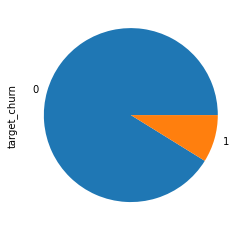

In [50]:
#Checking distribution of churn and non churn data
print((churn['target_churn'].value_counts()/len(churn))*100)
((churn['target_churn'].value_counts()/len(churn))*100).plot(kind="pie")
plt.show()

There is high class imbalance. So when we will building the model we need to apply some class balancing techniques

In [51]:
#Dividing data into churn and non churn 
data_churn = churn[churn['target_churn'] == 1]
data_nochurn = churn[churn['target_churn'] == 0]

In [52]:
data_churn.total_og_mou_8.describe()

count    2234.000000
mean      176.662556
std       406.782192
min         0.000000
25%         0.000000
50%         0.000000
75%       150.577500
max      4259.010000
Name: total_og_mou_8, dtype: float64

In [53]:
data_nochurn.total_og_mou_8.describe()

count    23089.000000
mean       535.718323
std        622.211000
min          0.000000
25%         88.330000
50%        344.190000
75%        770.260000
max      14043.060000
Name: total_og_mou_8, dtype: float64

Looking at the above report and median, we can say that the customers who churned have used the network less in the action phase as compared to non churn customers.

In [54]:
def plotDistPlots(cols):
    for col in cols:
        #print(col)
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 2, 1)
        sns.distplot(data_churn[col])
        plt.axvline(data_churn[col].mean(), c="black")
        plt.axvline(data_churn[col].median(), c="red")
        plt.title("CHURN")
        
        plt.subplot(1, 2, 2)
        sns.distplot(data_nochurn[col])
        plt.axvline(data_nochurn[col].mean(), c="black")
        plt.axvline(data_nochurn[col].median(), c="red")
        plt.title("NO CHURN")

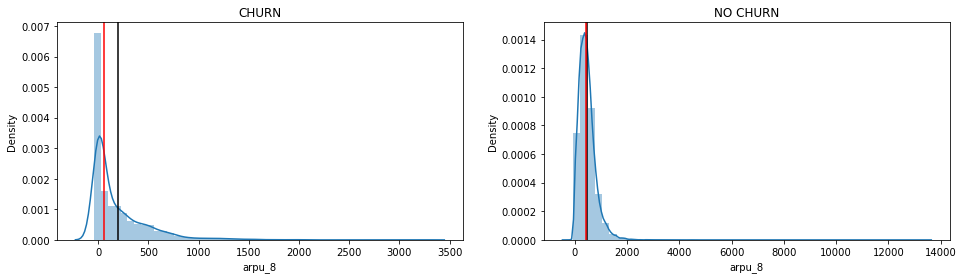

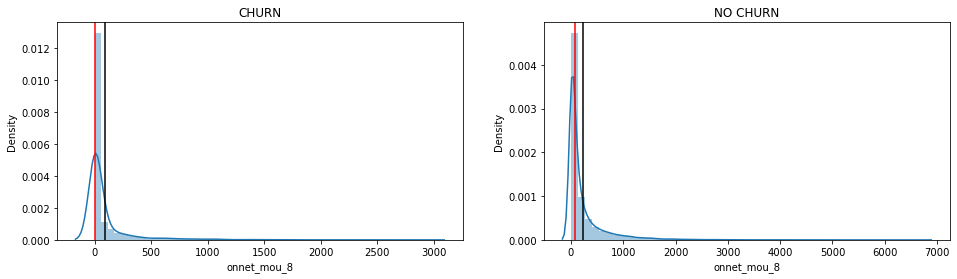

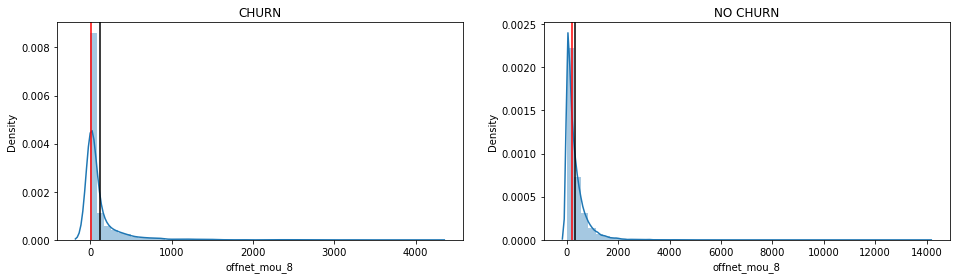

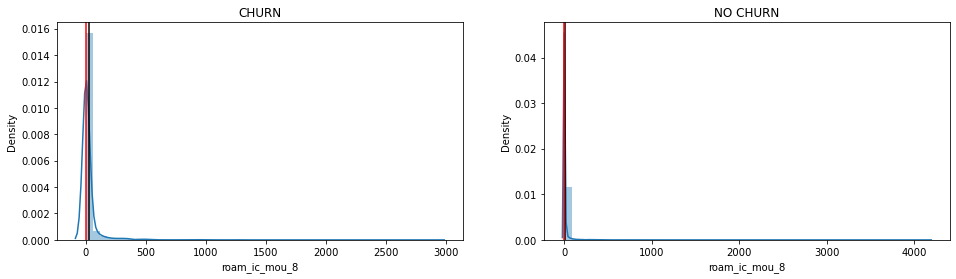

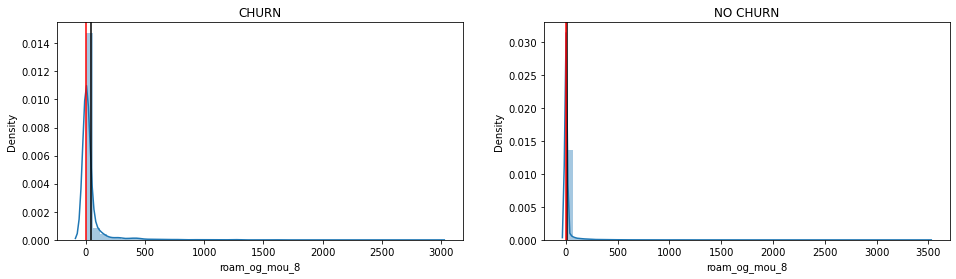

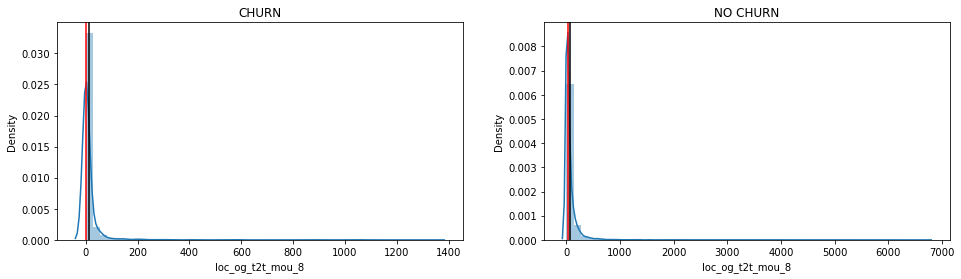

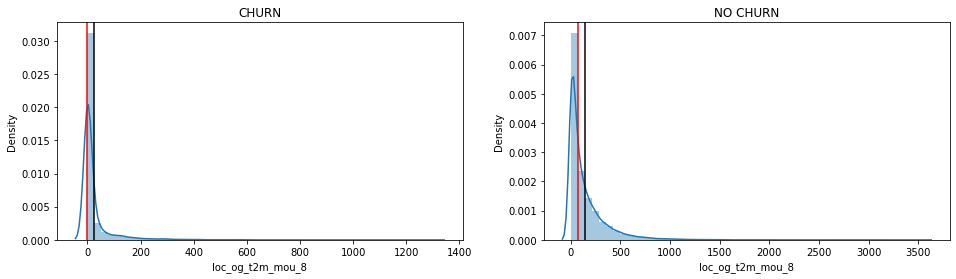

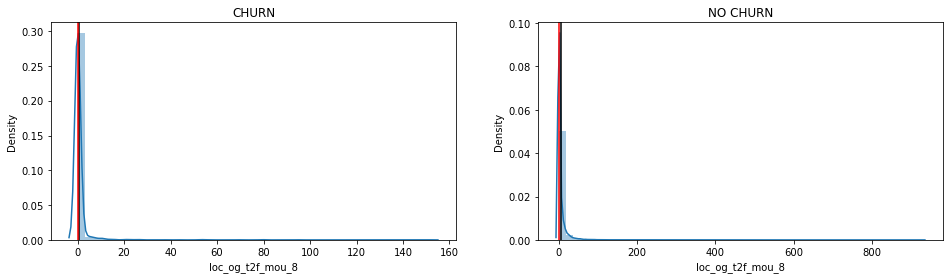

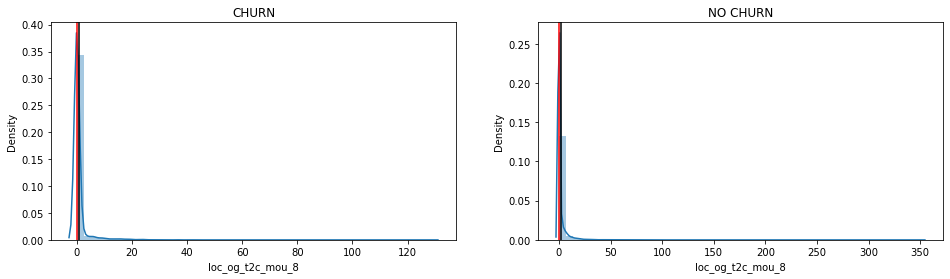

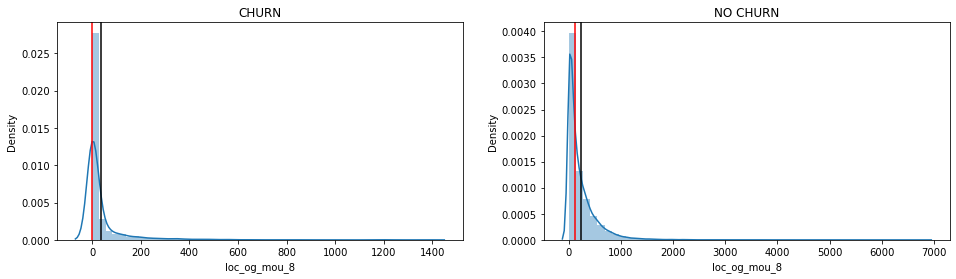

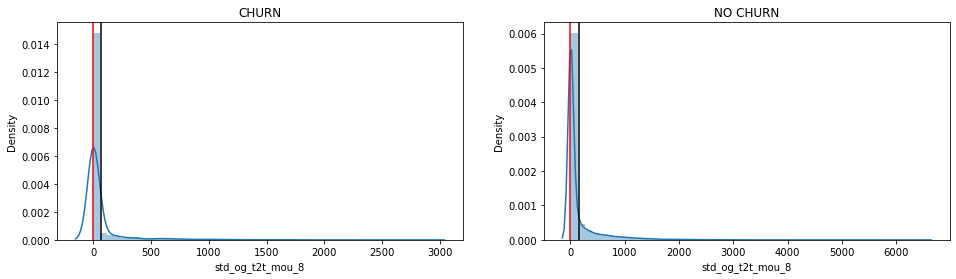

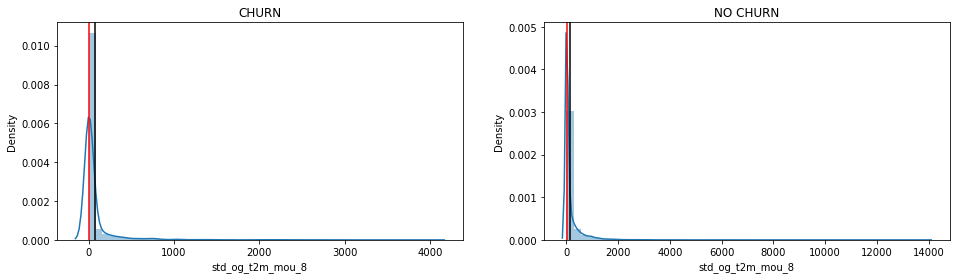

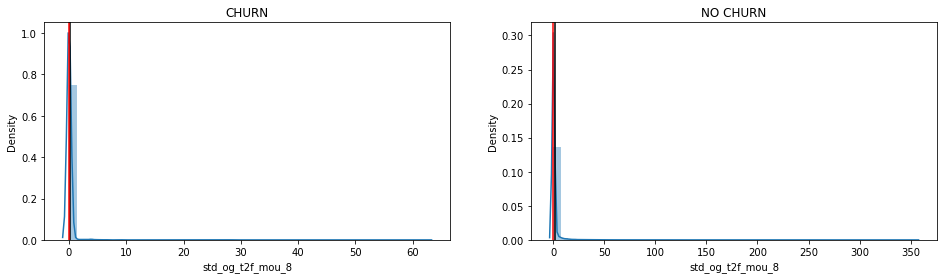

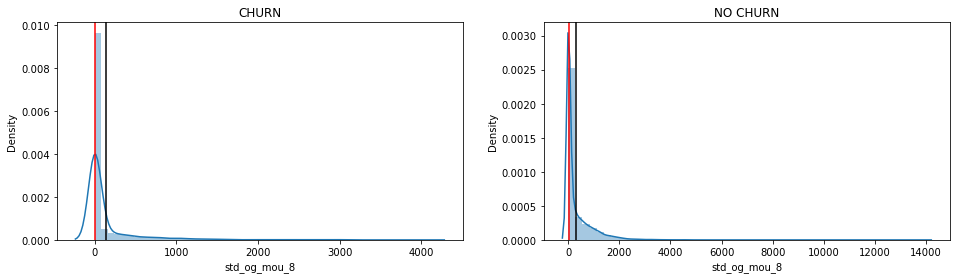

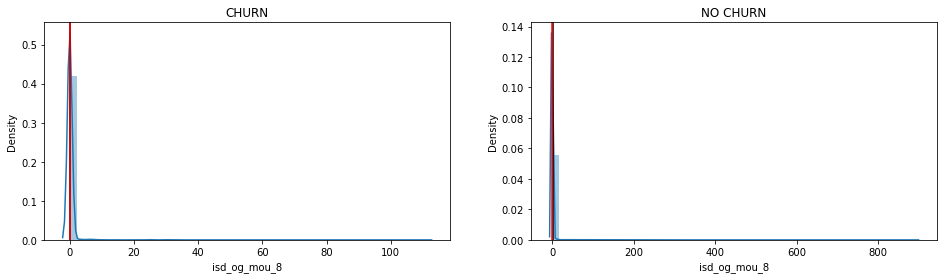

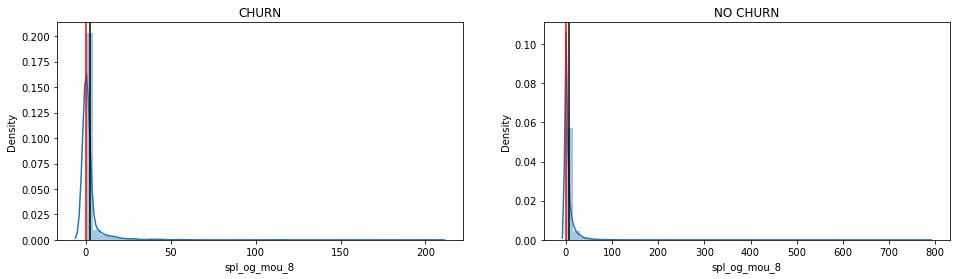

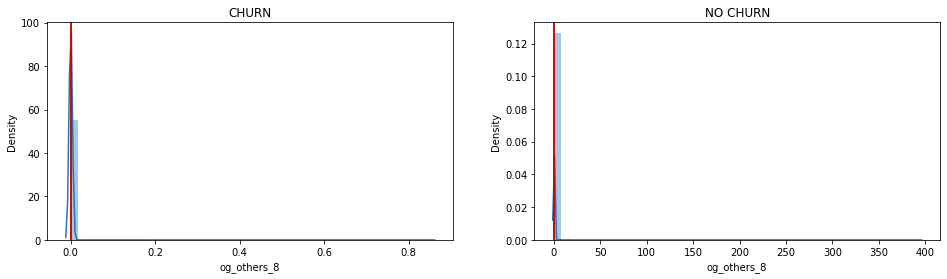

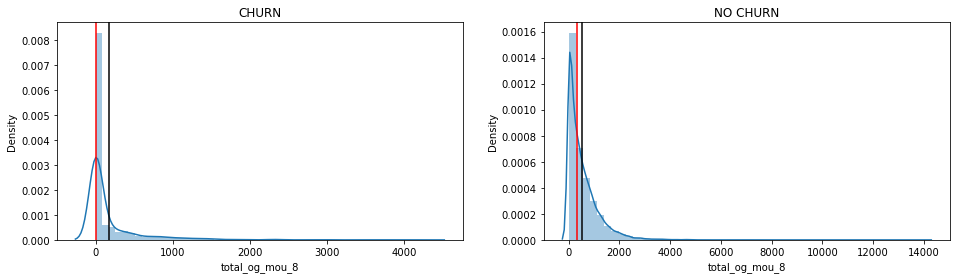

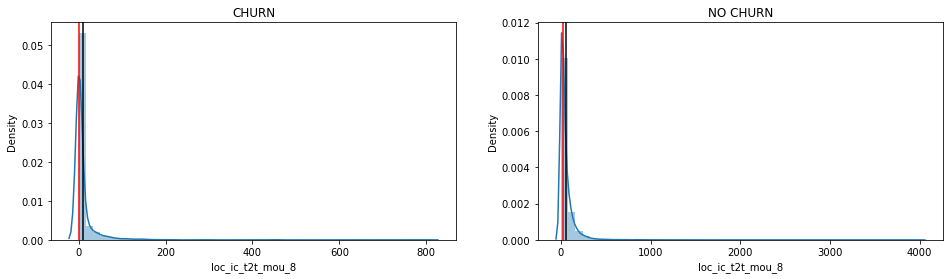

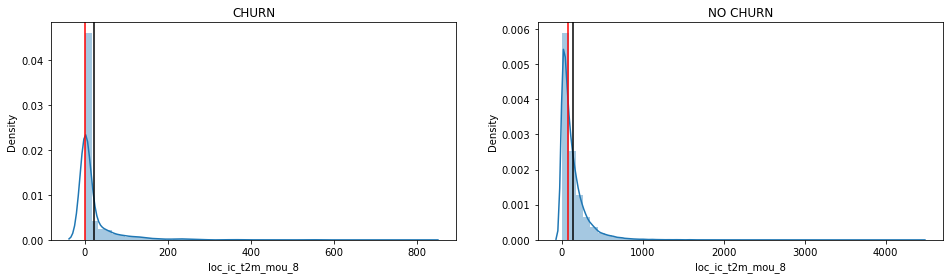

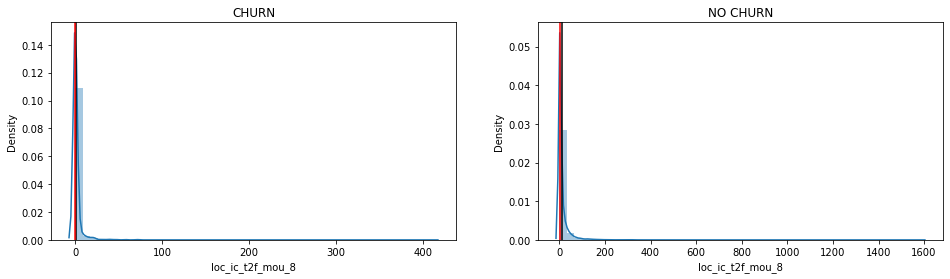

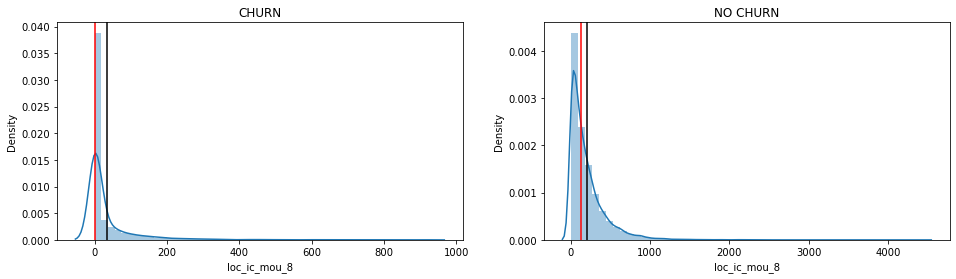

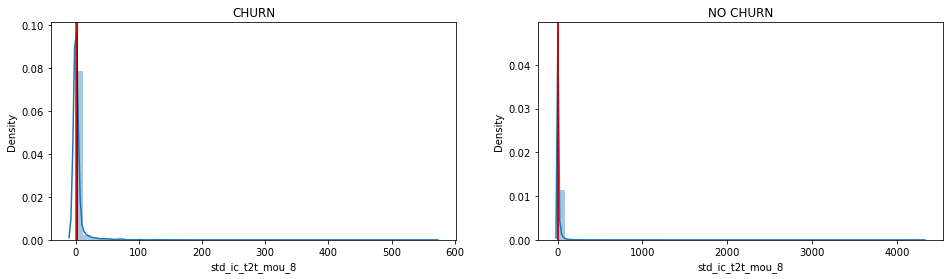

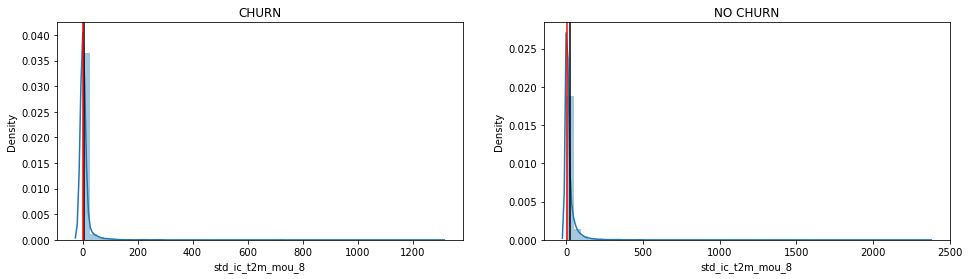

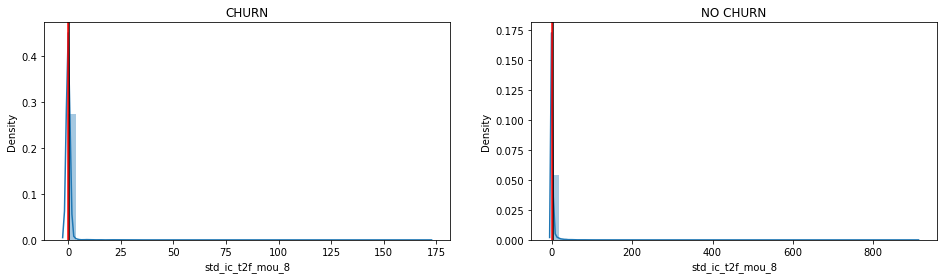

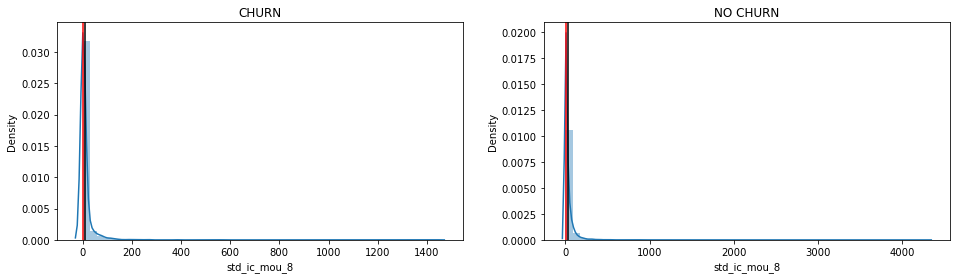

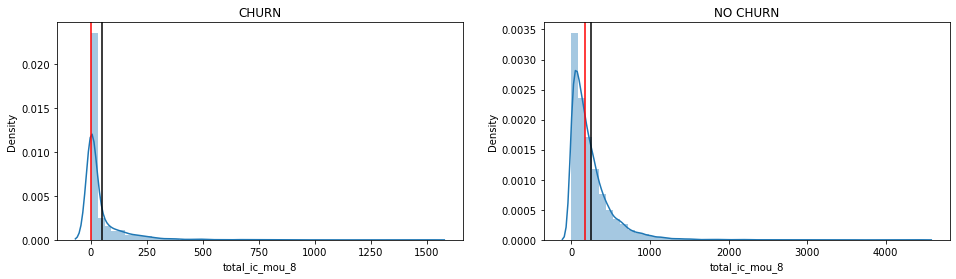

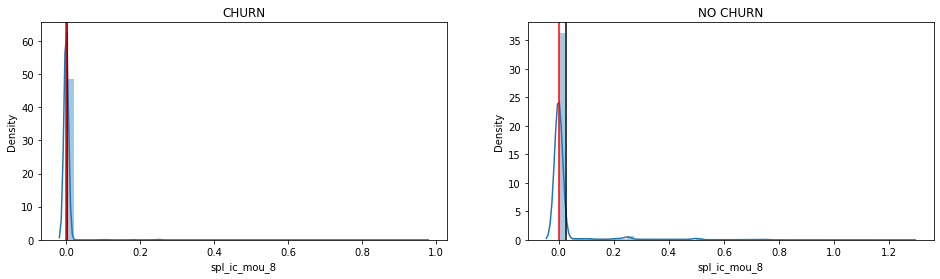

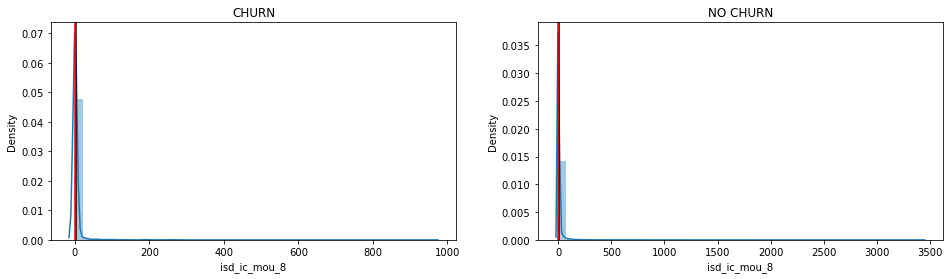

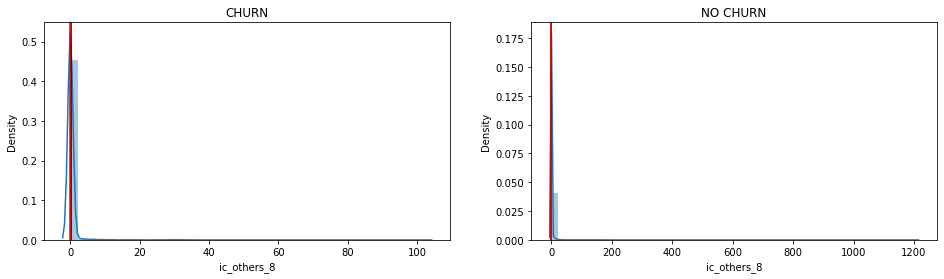

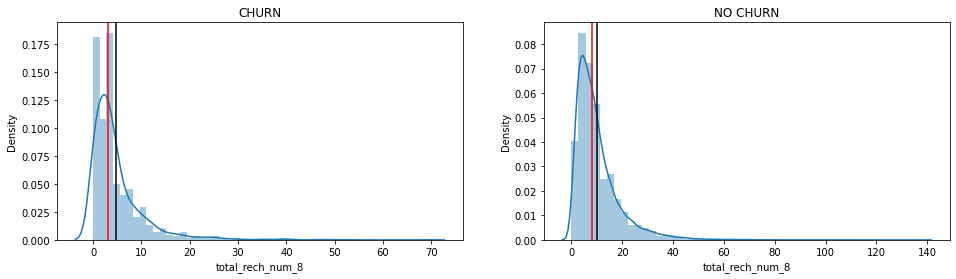

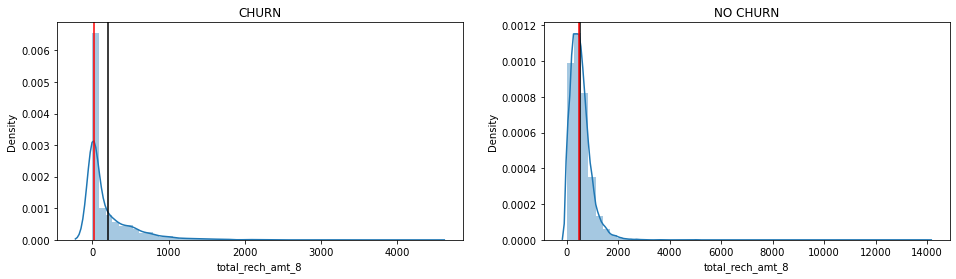

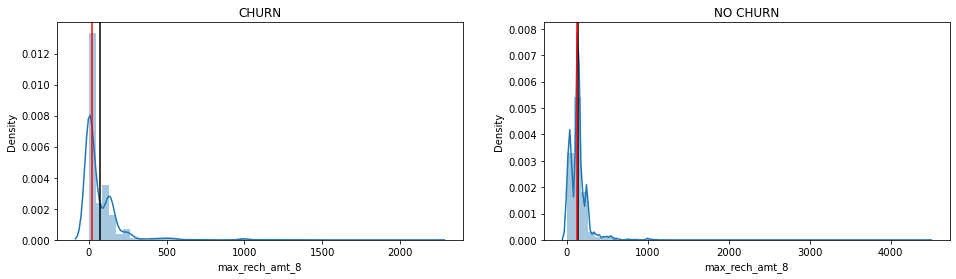

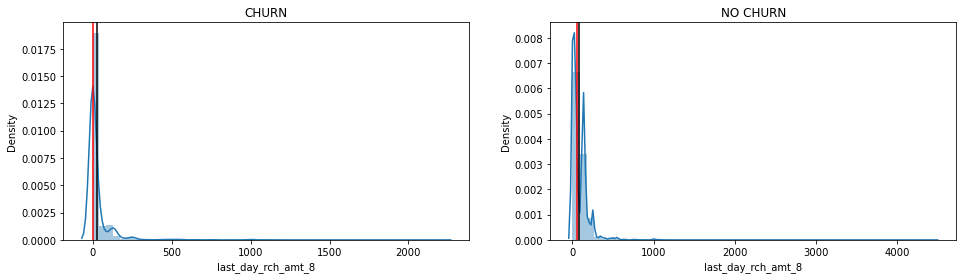

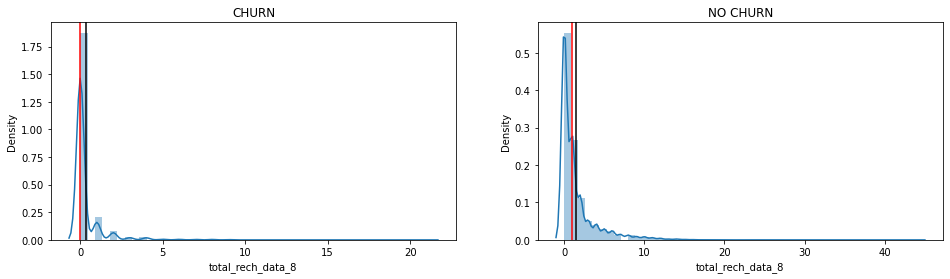

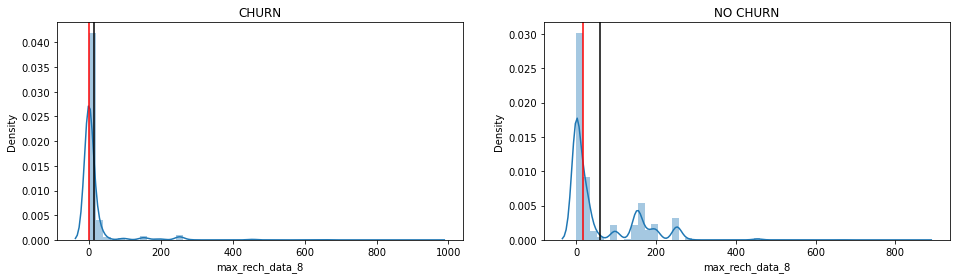

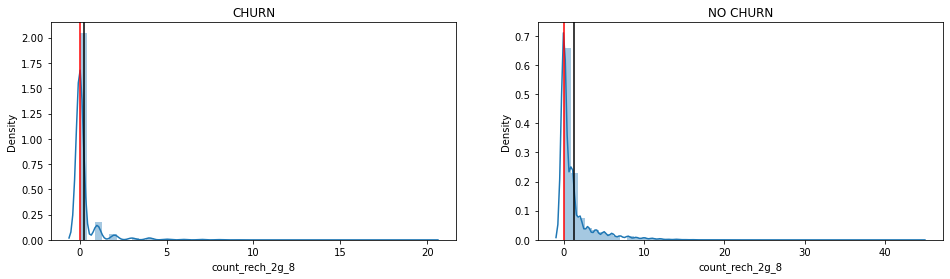

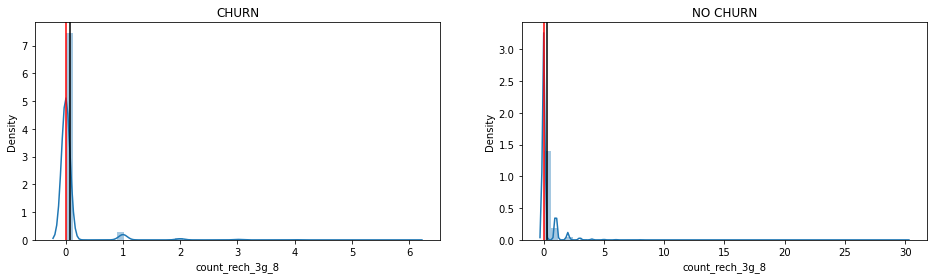

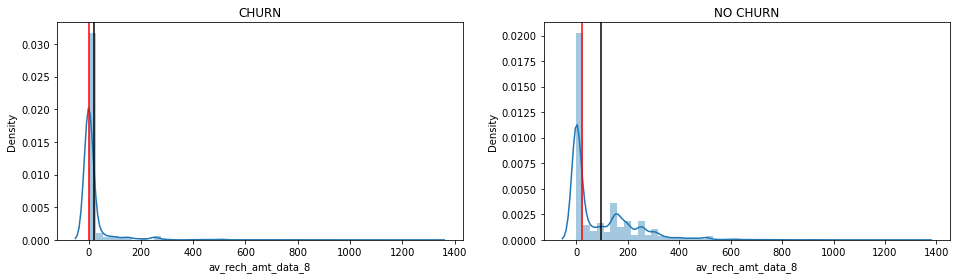

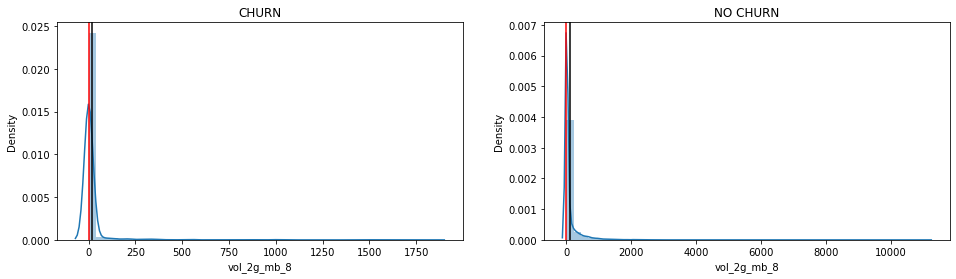

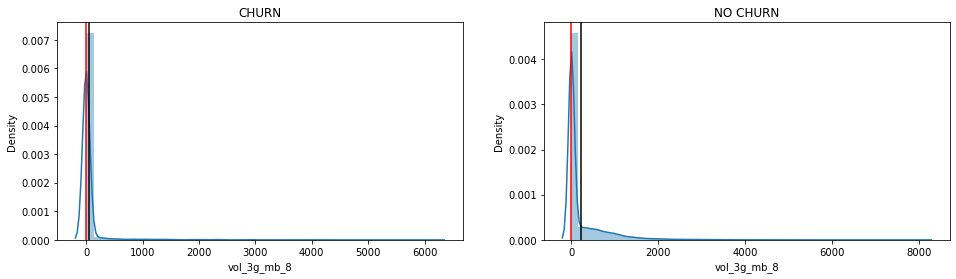

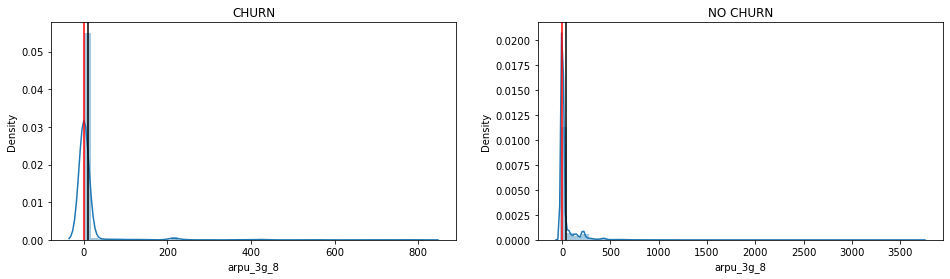

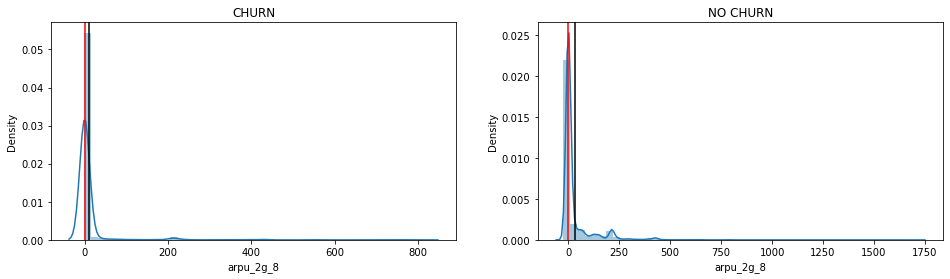

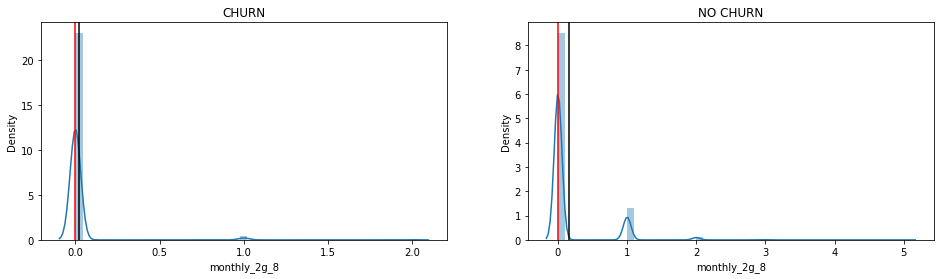

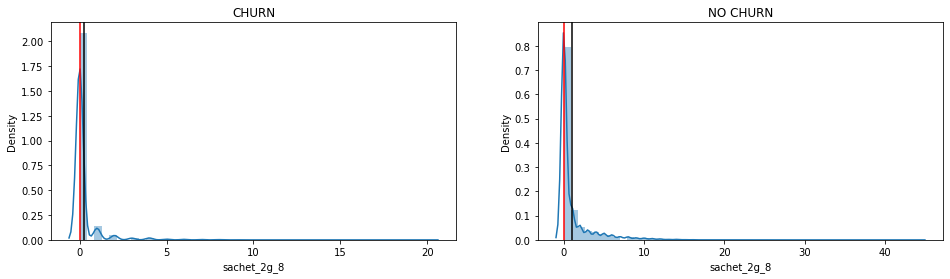

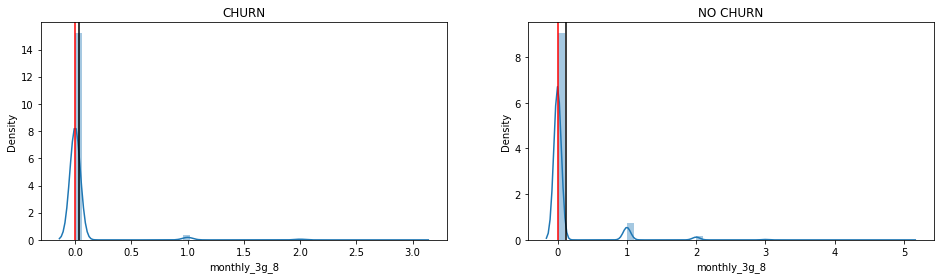

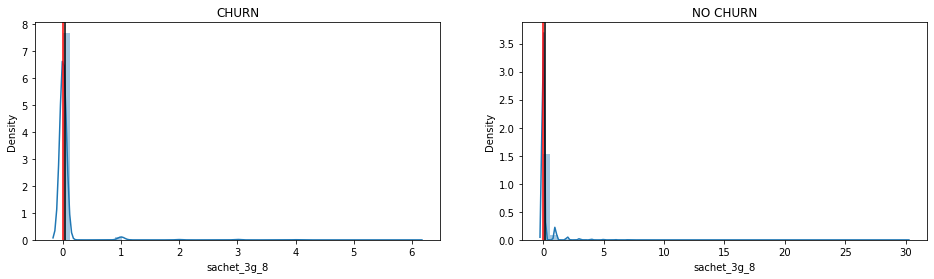

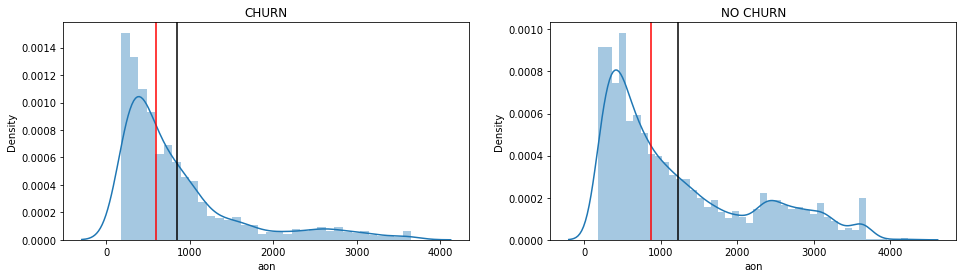

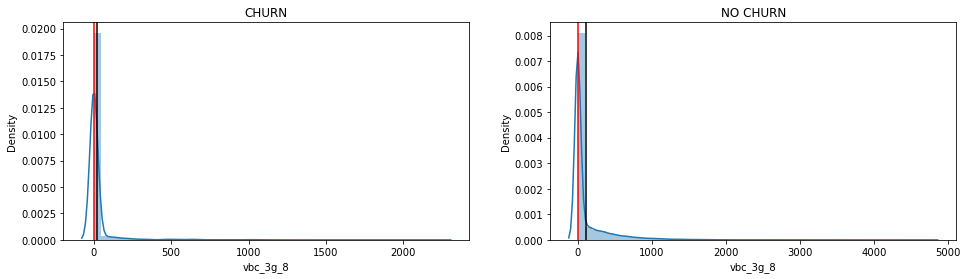

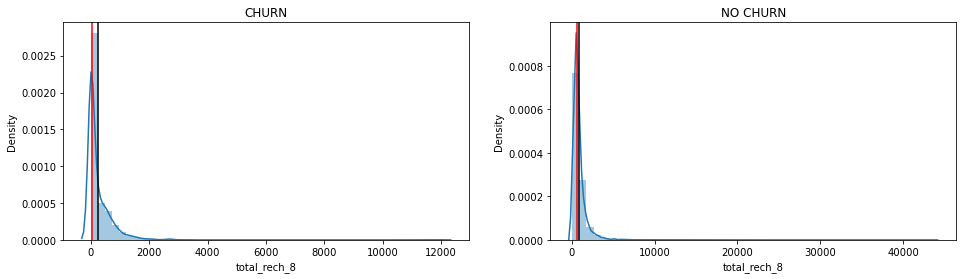

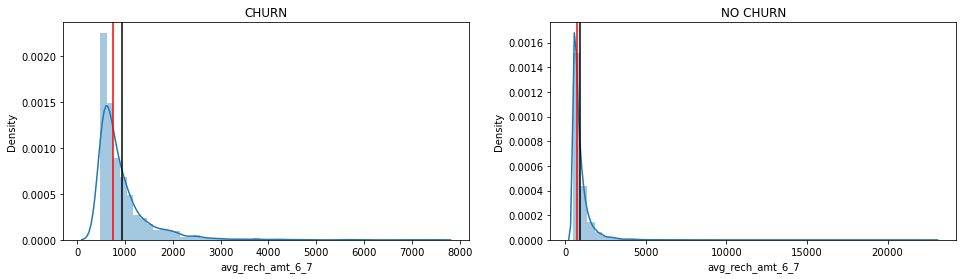

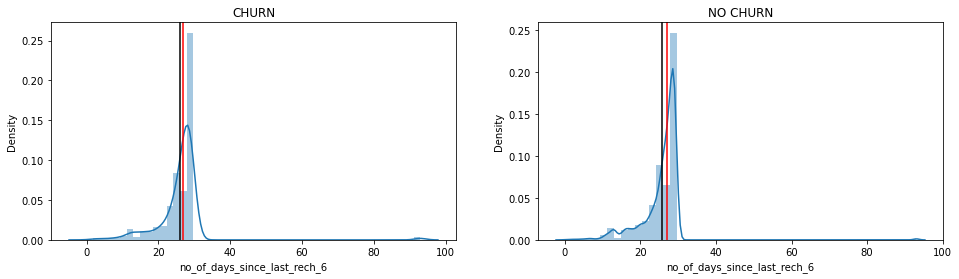

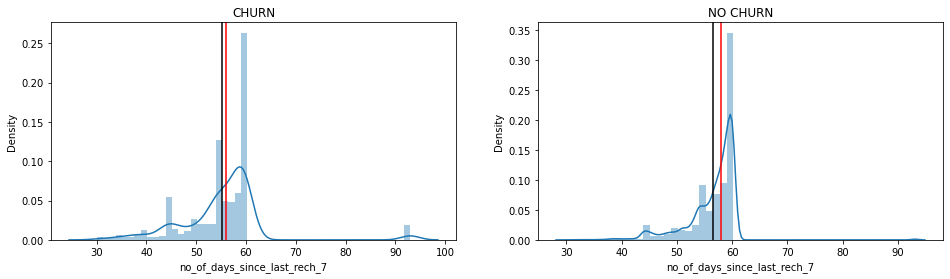

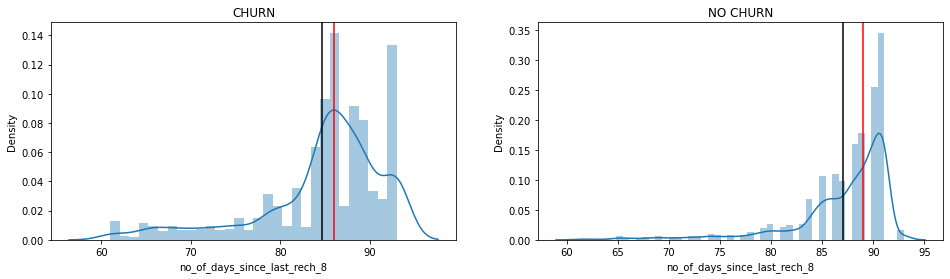

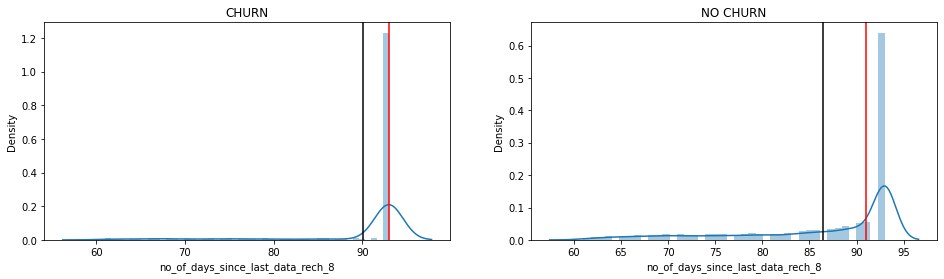

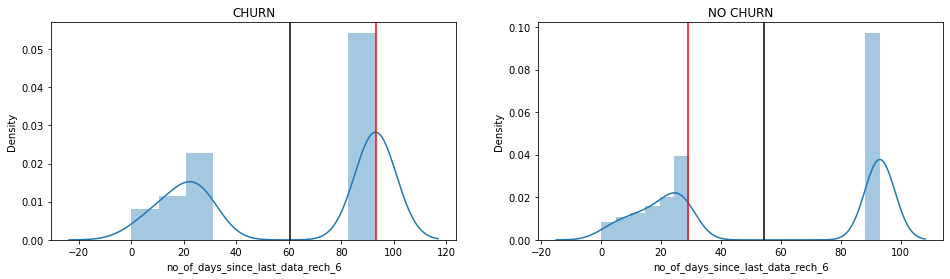

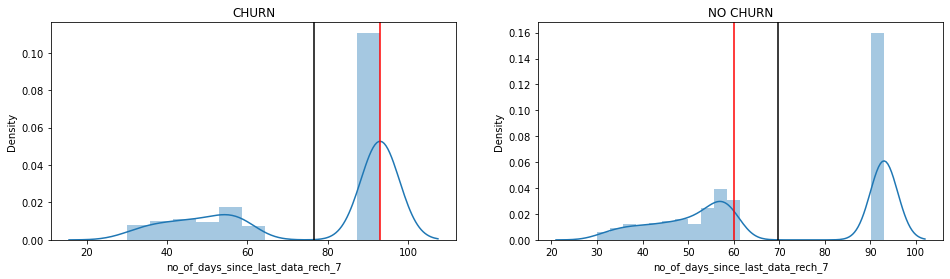

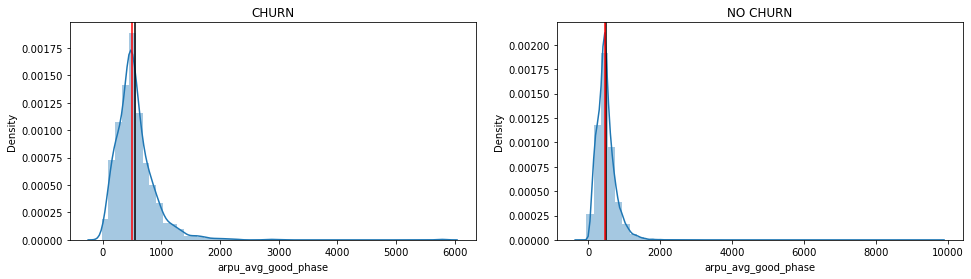

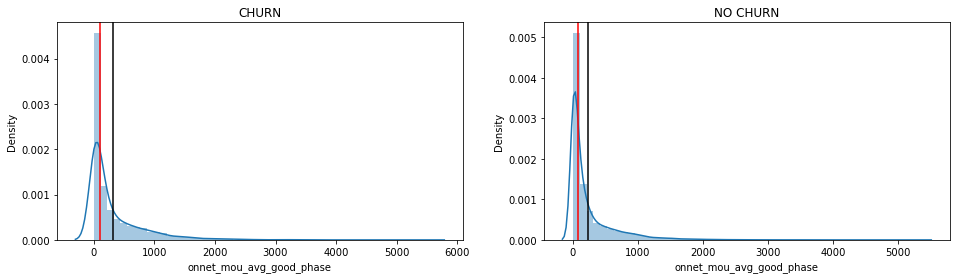

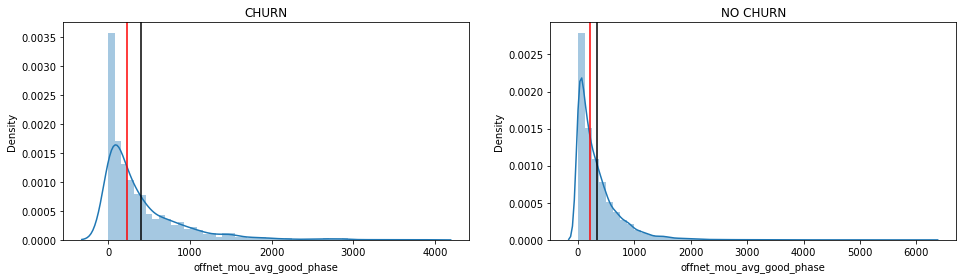

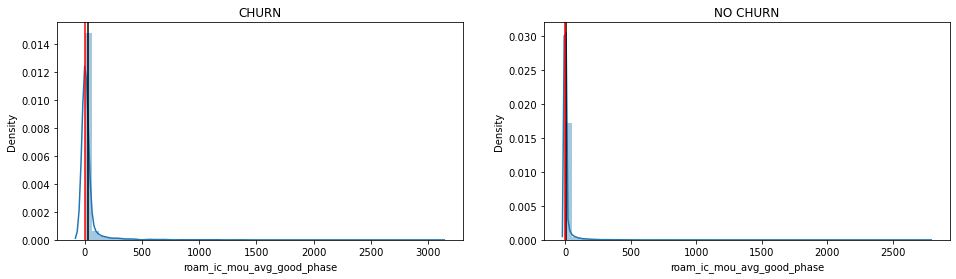

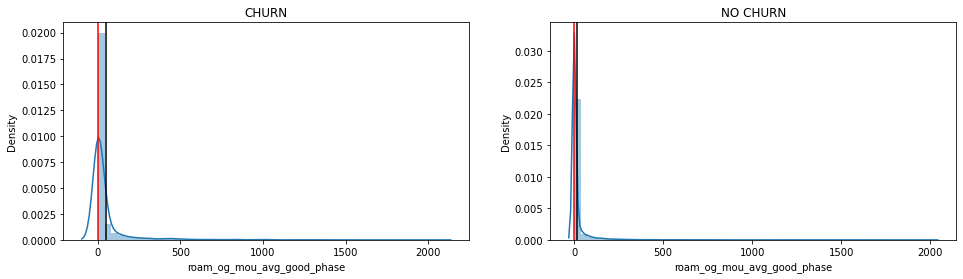

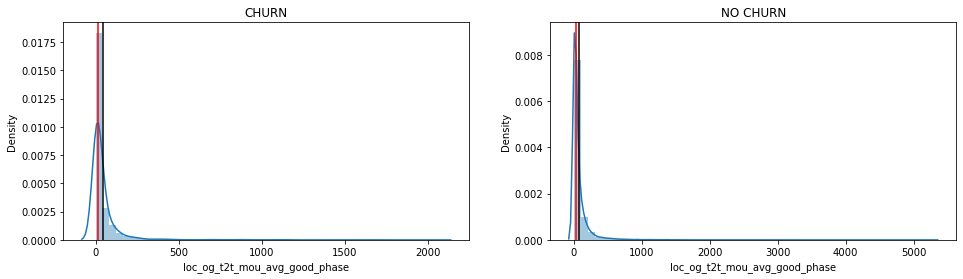

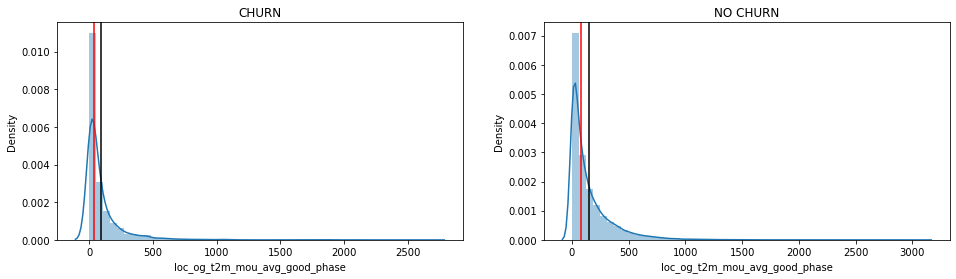

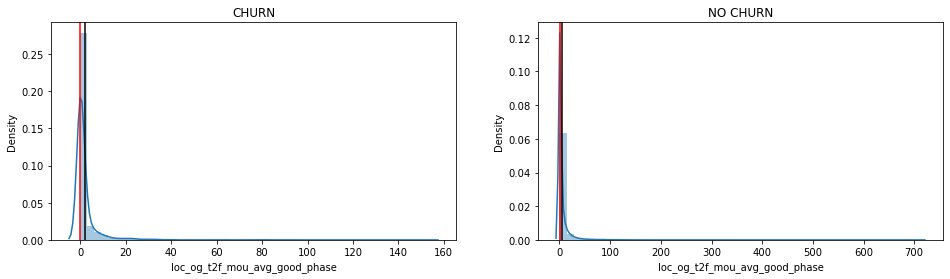

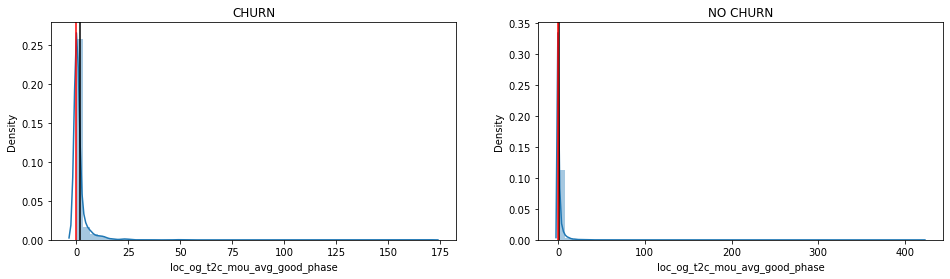

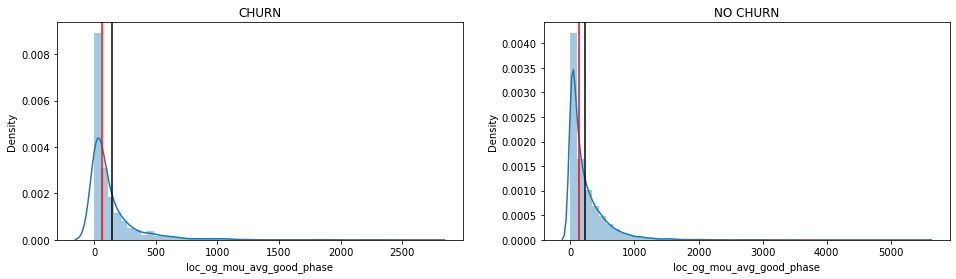

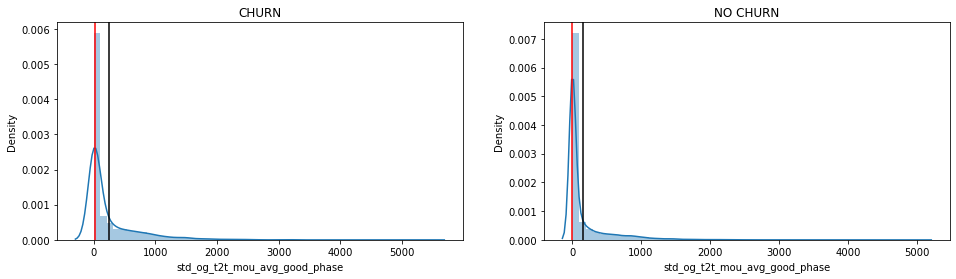

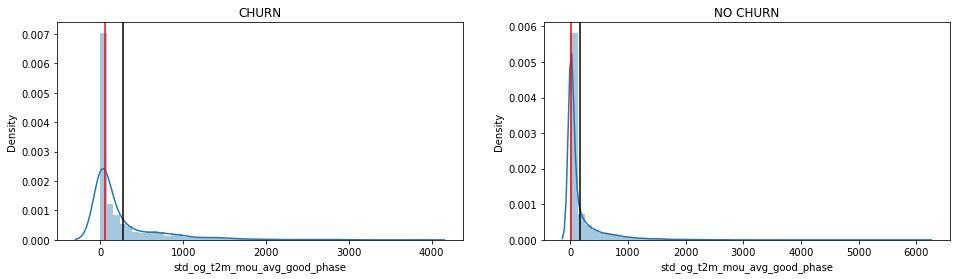

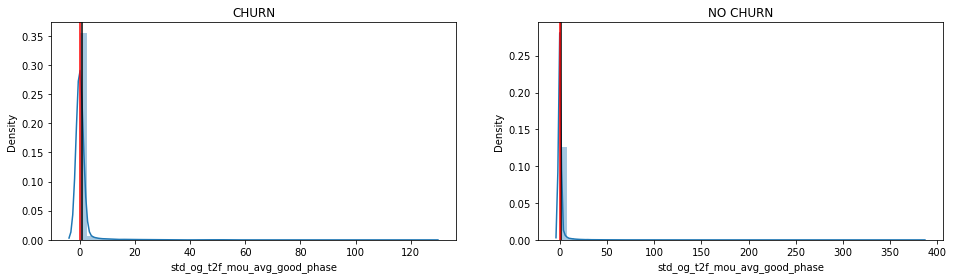

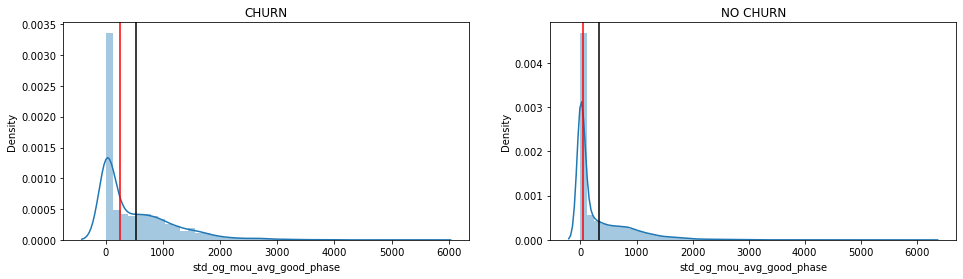

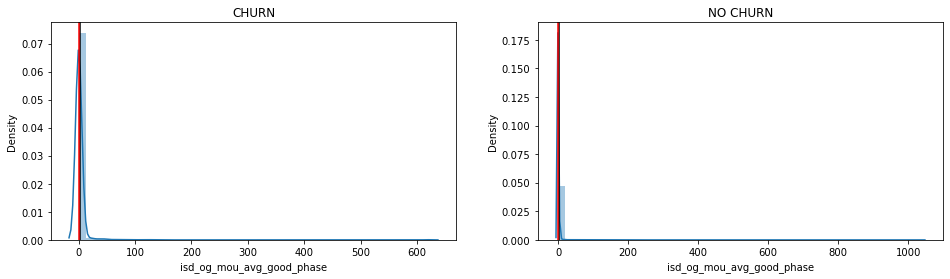

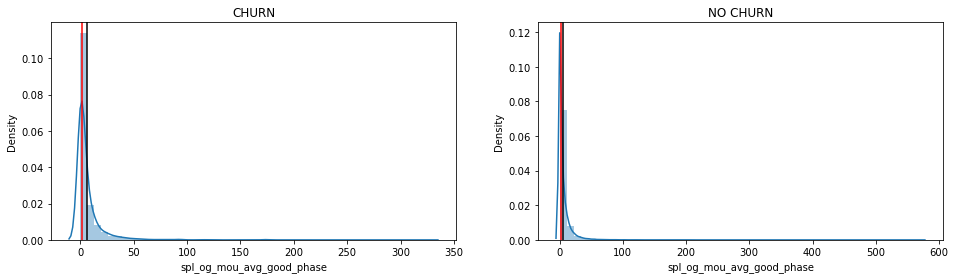

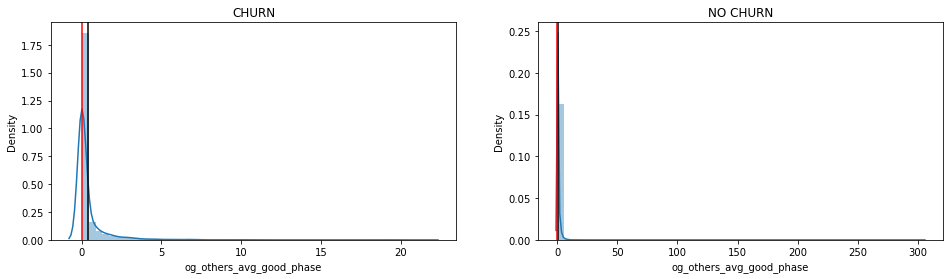

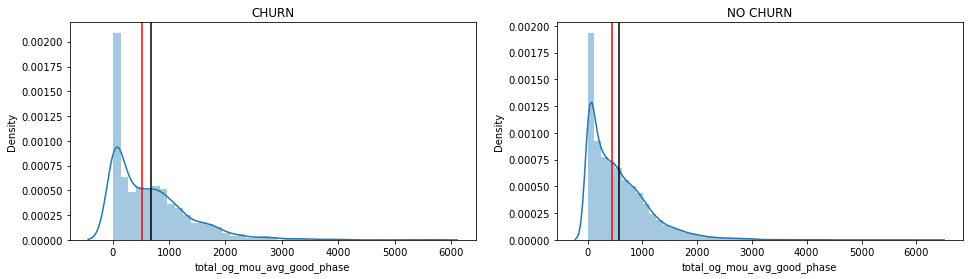

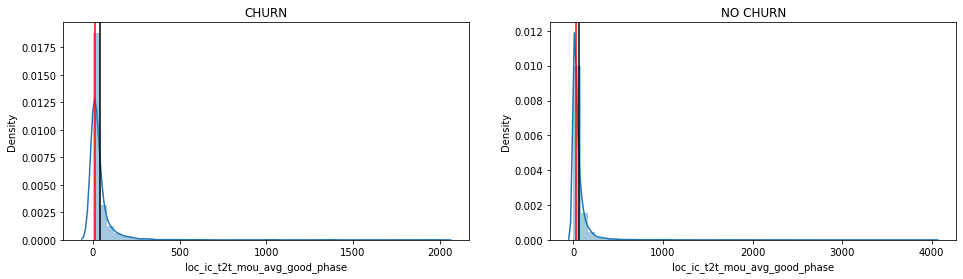

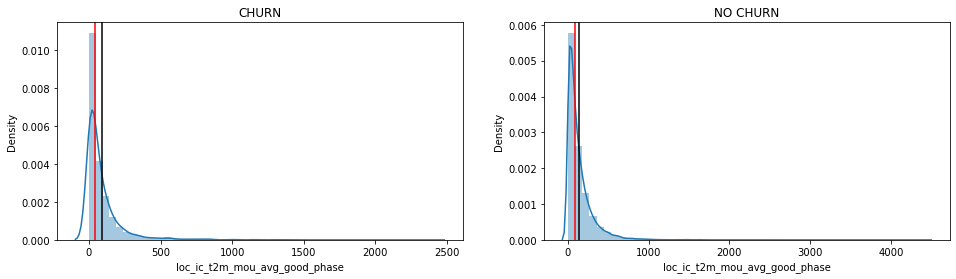

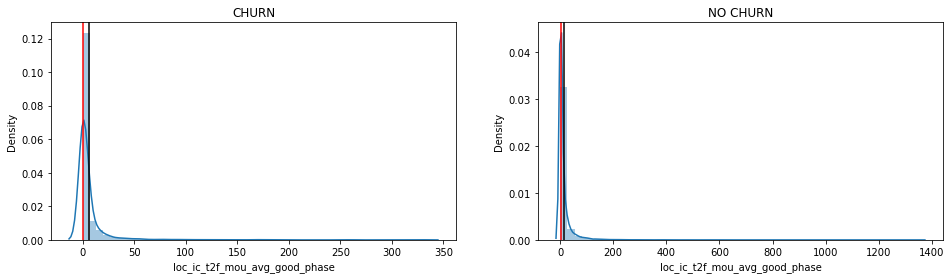

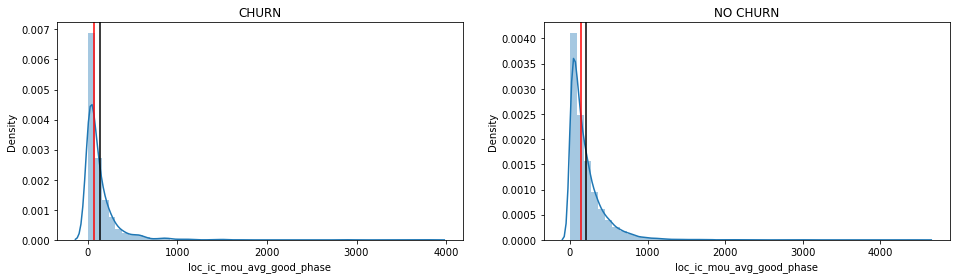

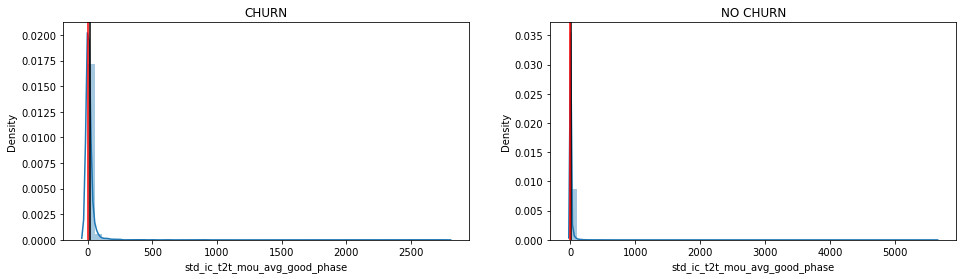

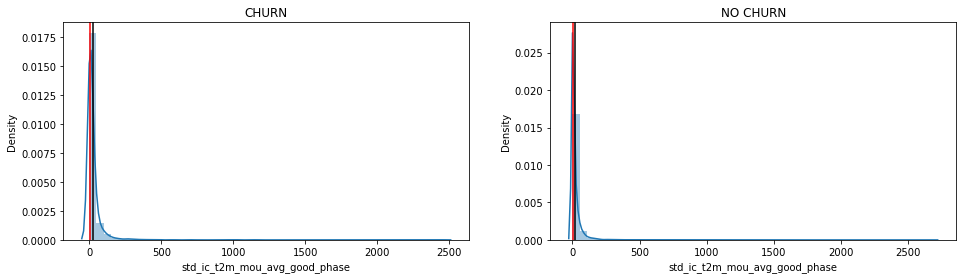

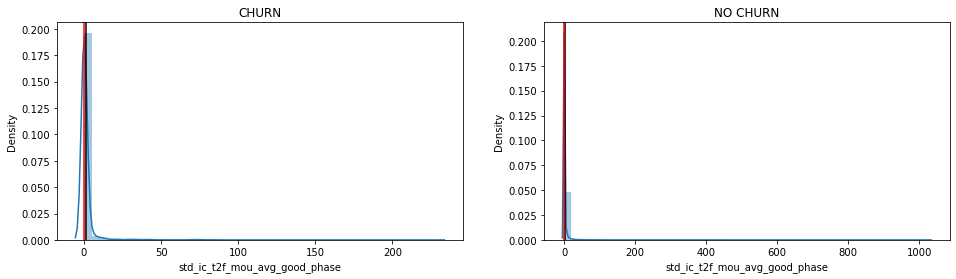

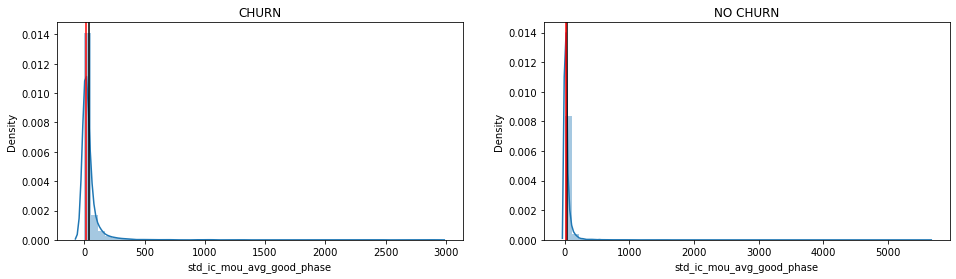

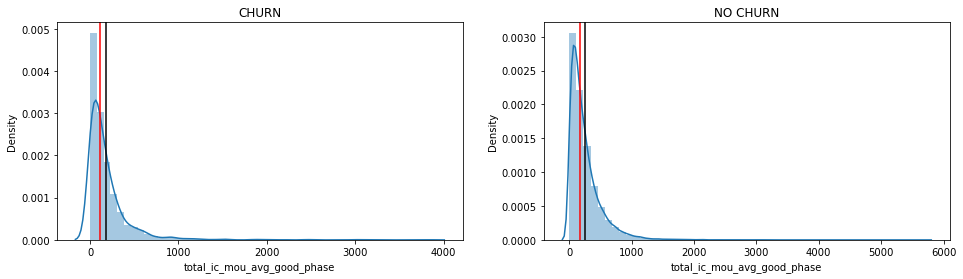

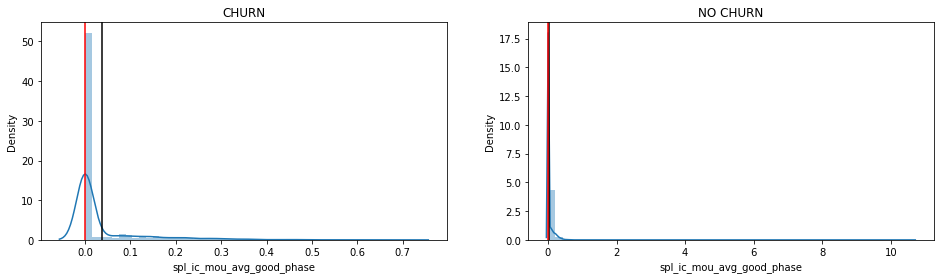

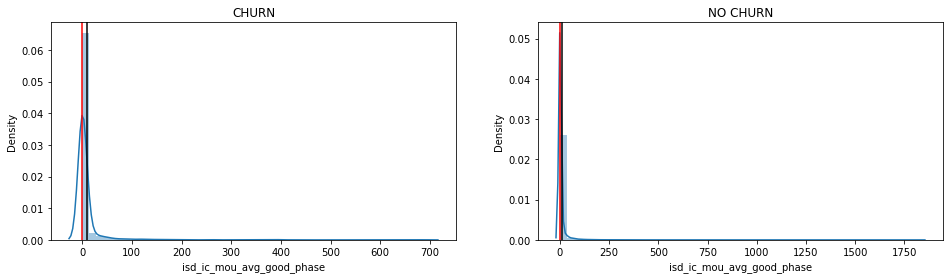

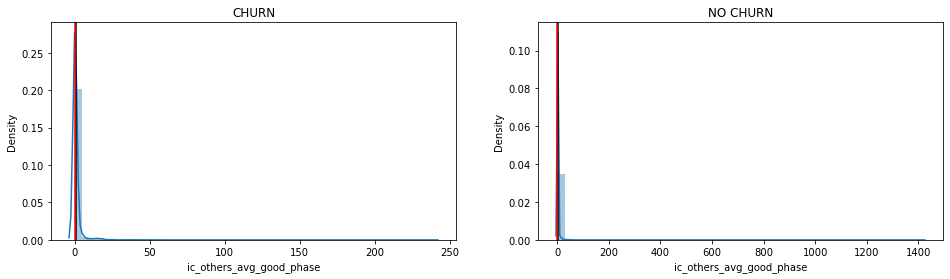

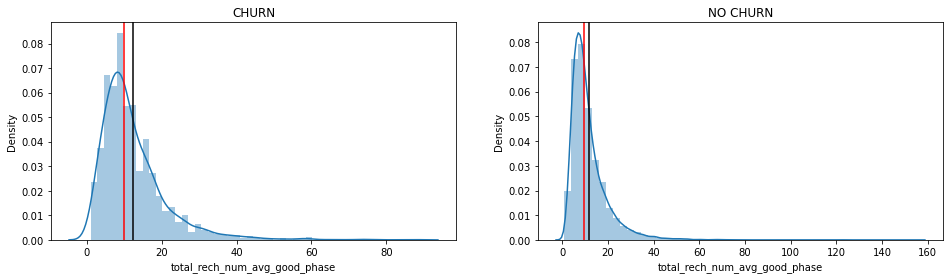

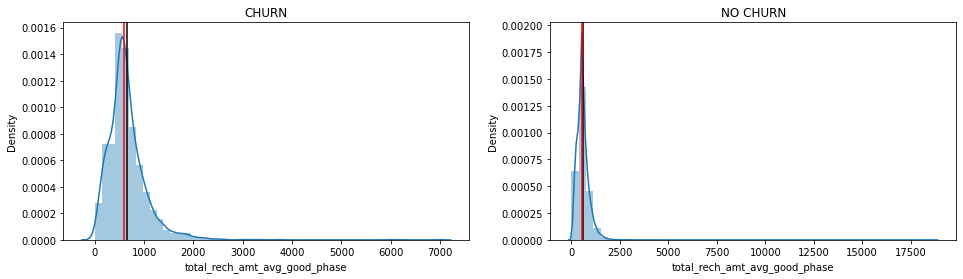

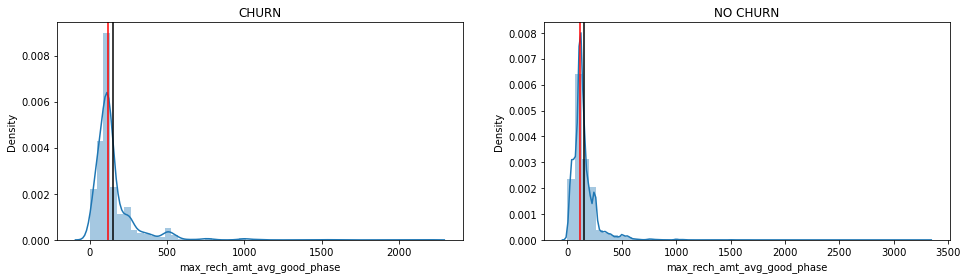

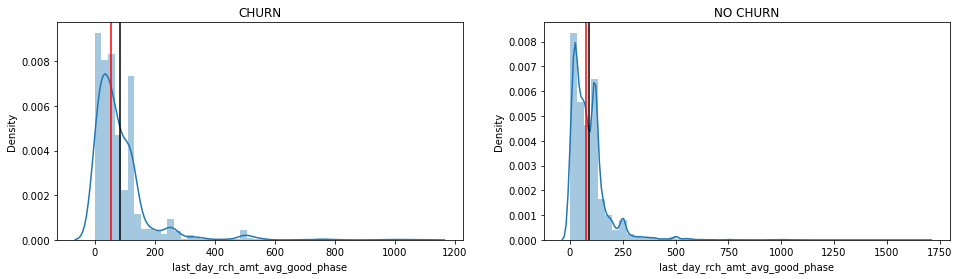

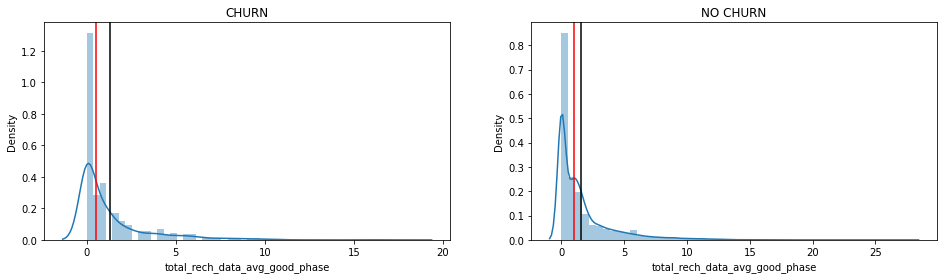

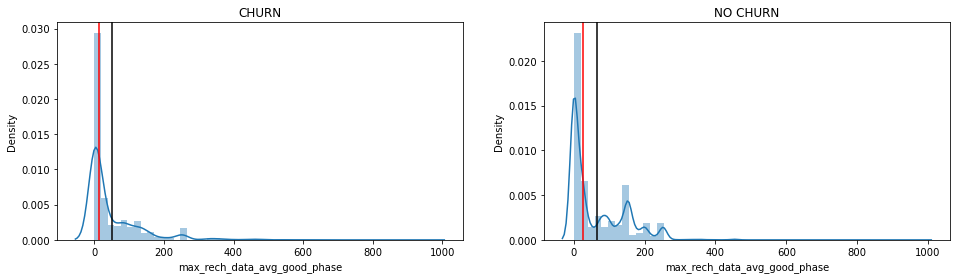

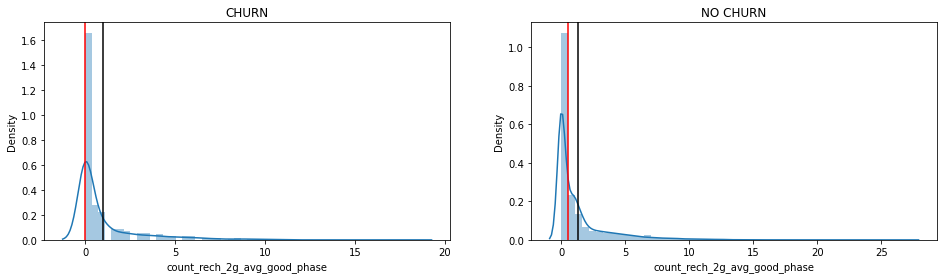

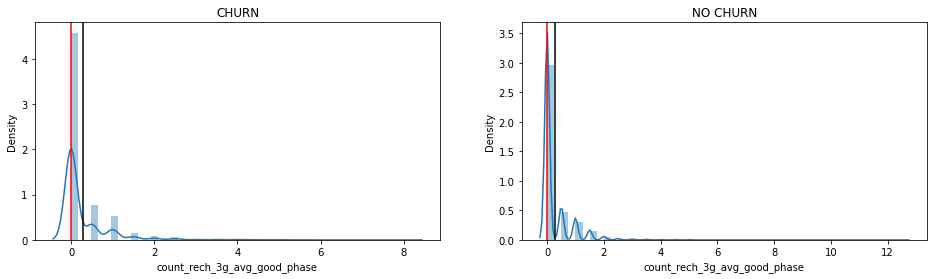

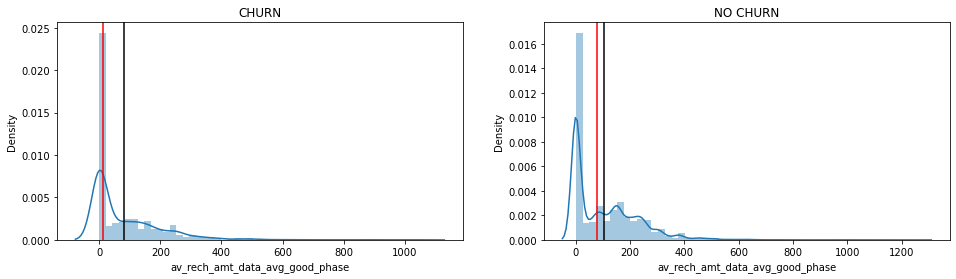

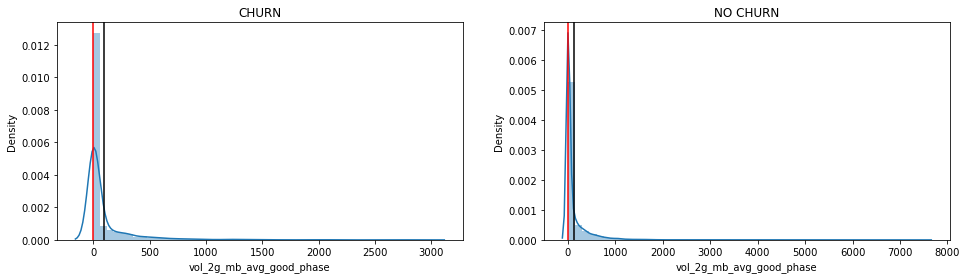

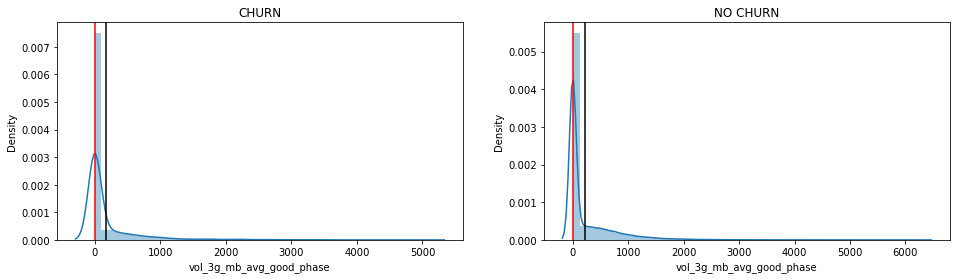

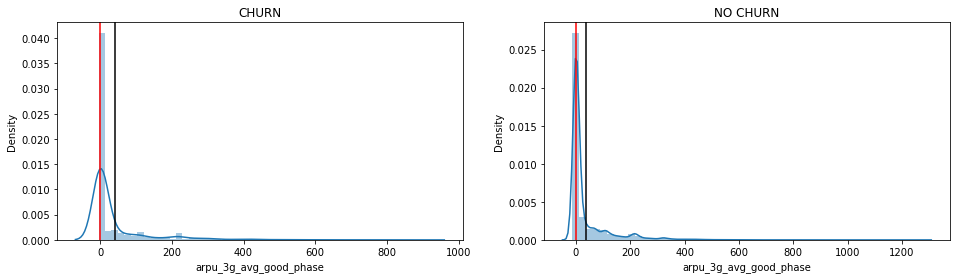

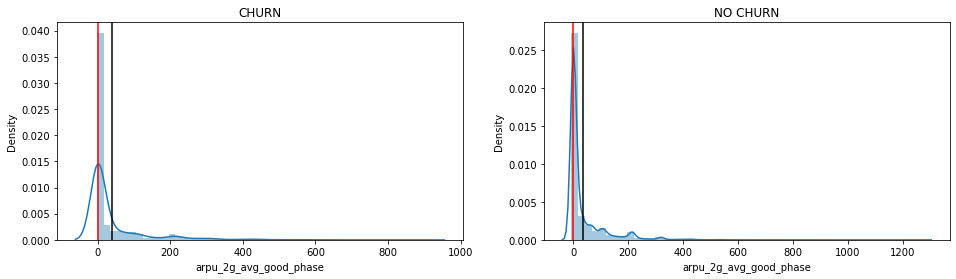

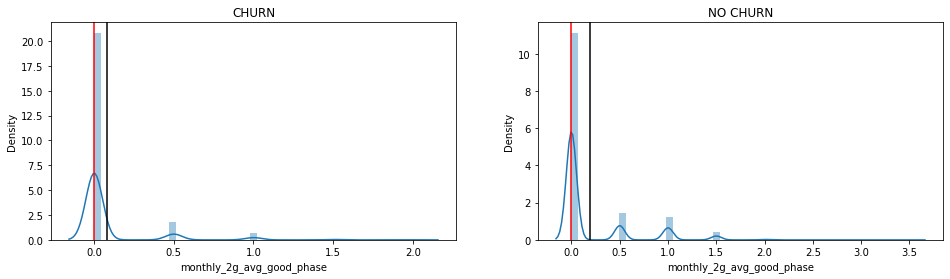

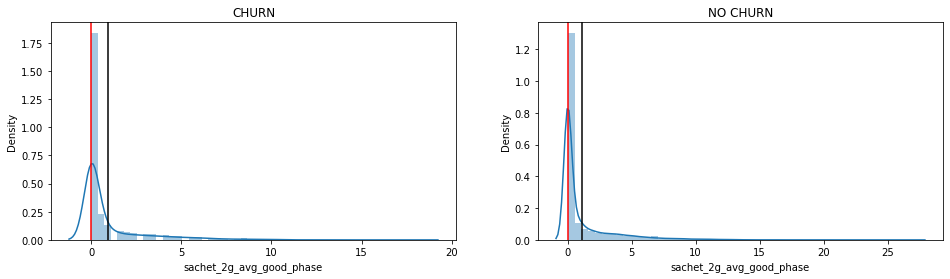

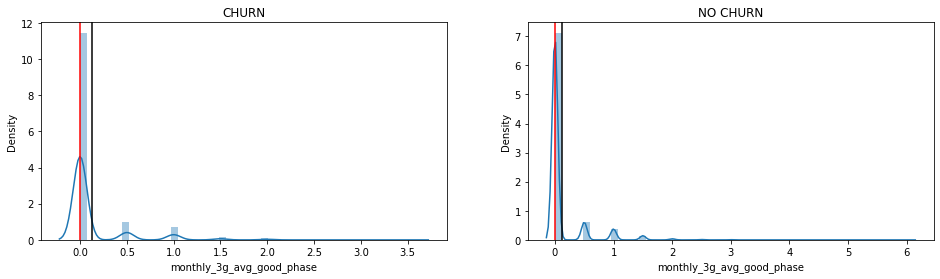

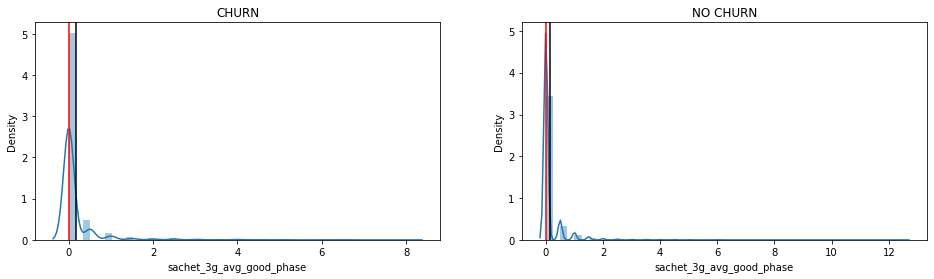

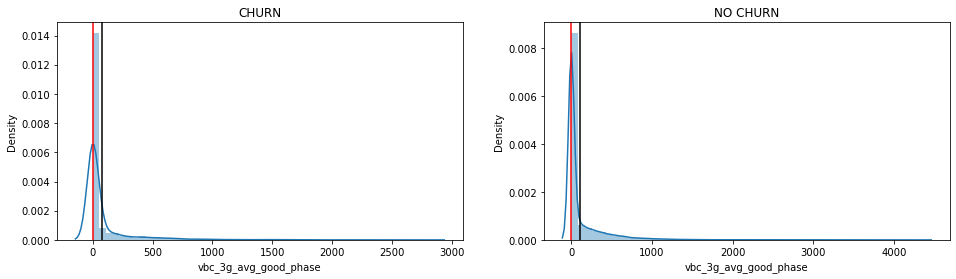

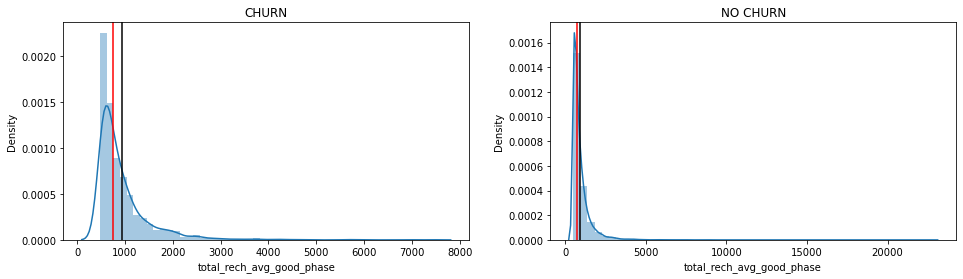

In [55]:
plotDistPlots(num_cols)

In [56]:
def churn_vs_nonchurn(var_l):
    for var in var_l:
        suffix_str_l = ['_avg_good_phase','_8']
        var_suffix_l = [var + x for x in suffix_str_l]
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 2, 1)
        sns.barplot(data=data_churn[var_suffix_l])
        plt.title("CHURN")

        plt.subplot(1, 2, 2)
        sns.barplot(data=data_nochurn[var_suffix_l])
        plt.title("NO CHURN")

In [57]:
numeric_cols

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_3g',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_rech']

In [58]:
churn.columns.to_list()

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'vbc_3g_8',


In [59]:
colsToCompare = numeric_cols.copy()

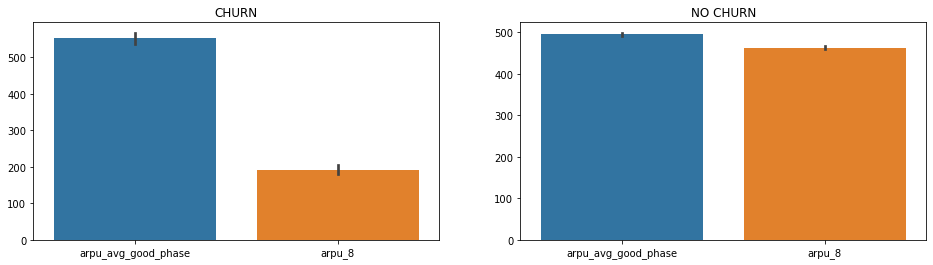

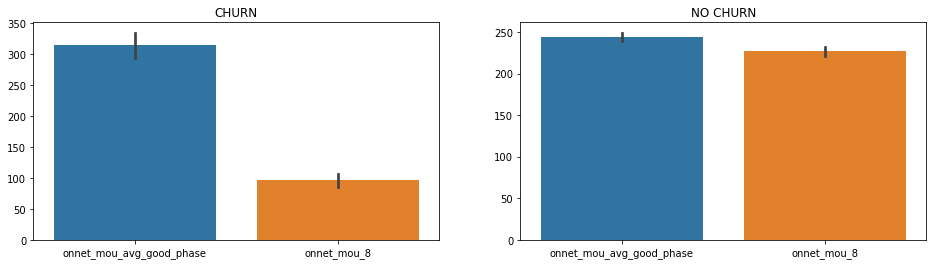

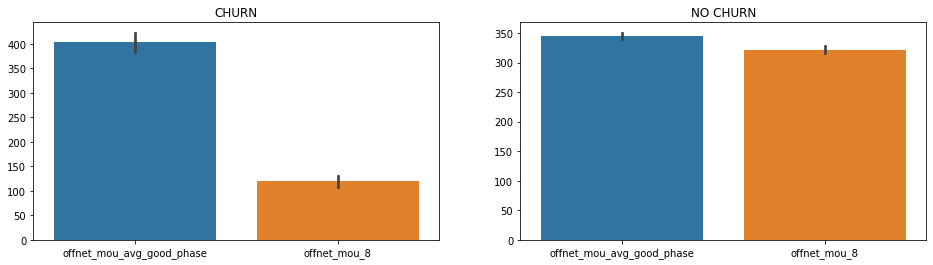

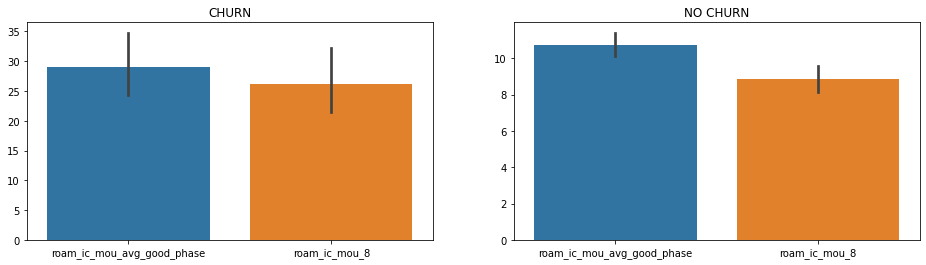

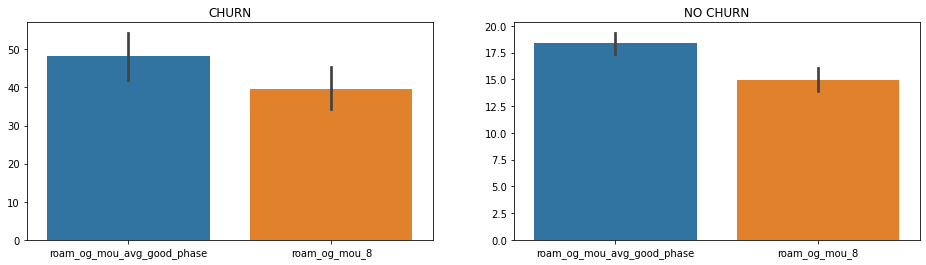

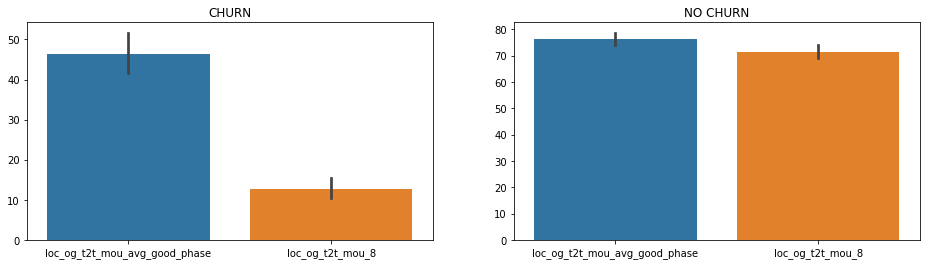

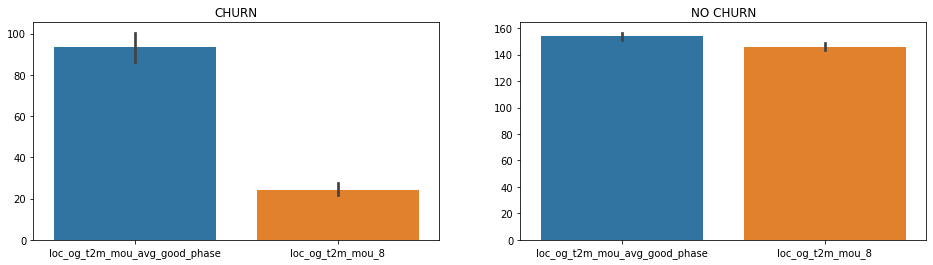

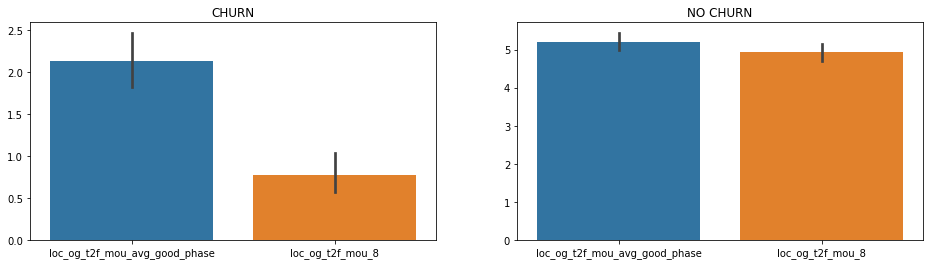

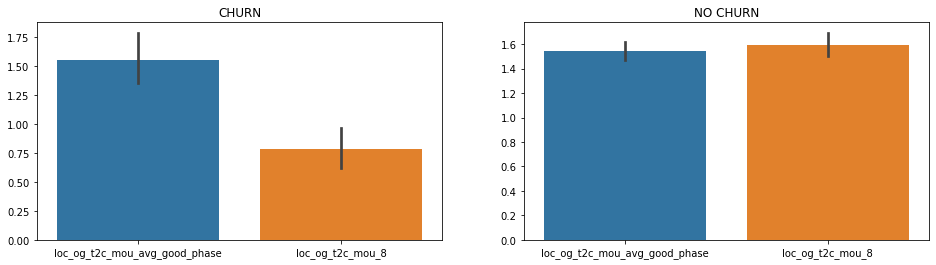

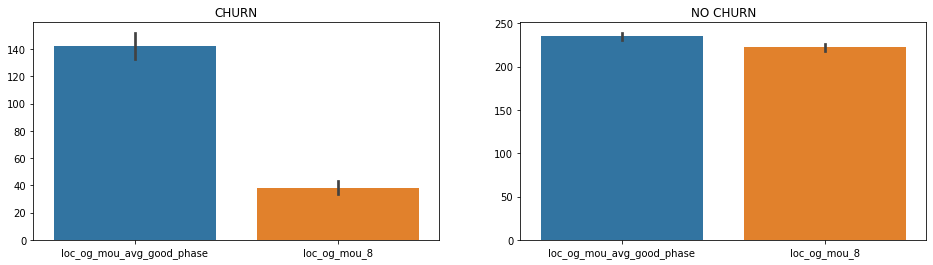

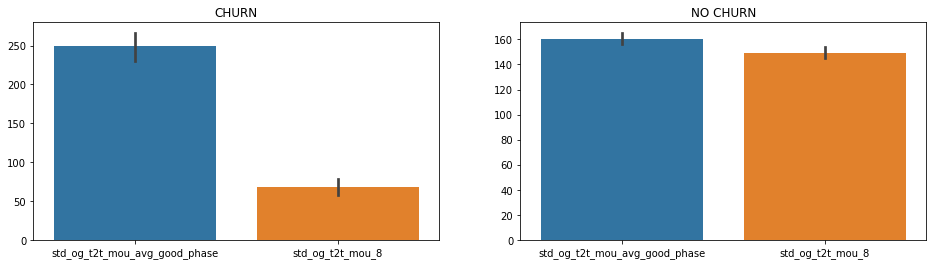

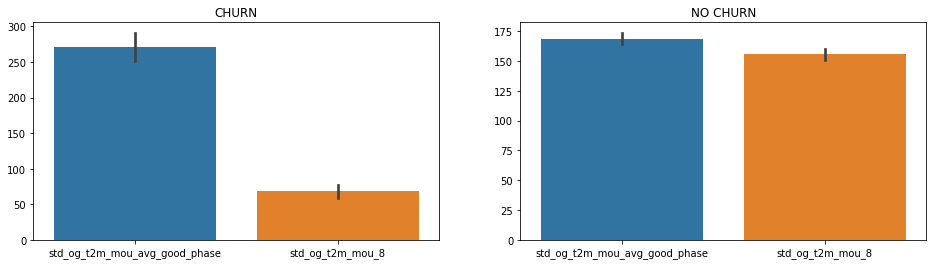

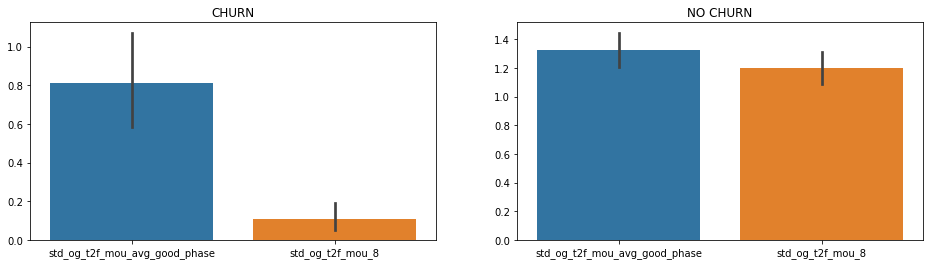

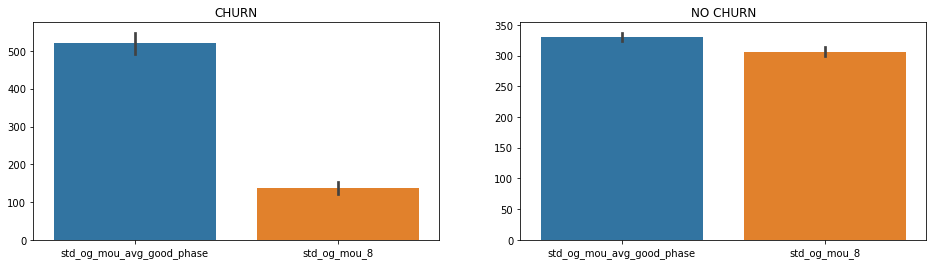

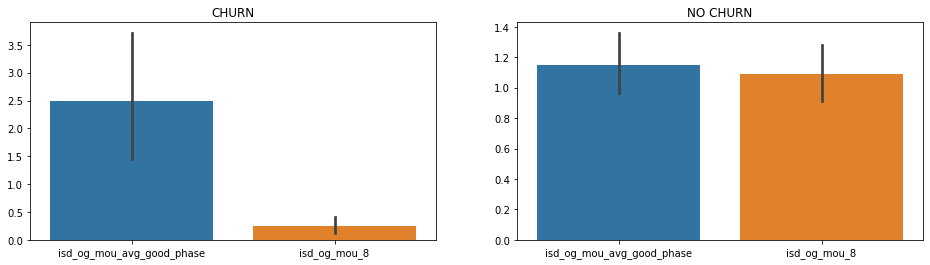

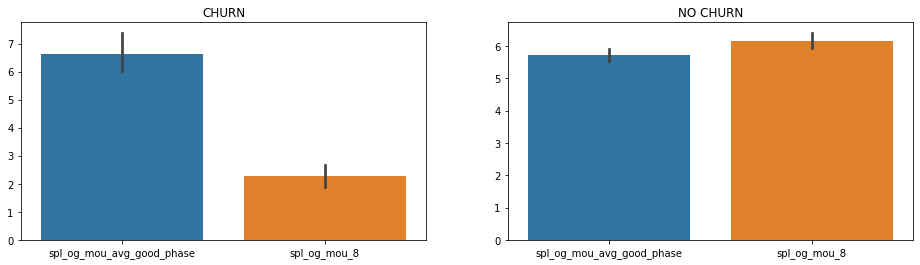

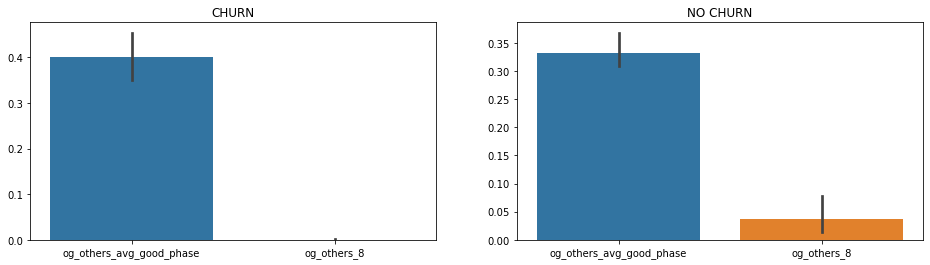

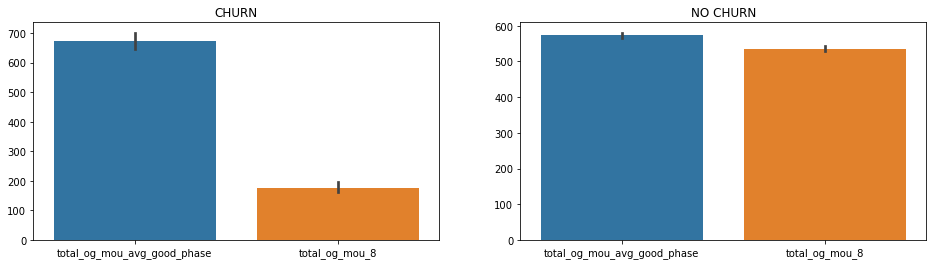

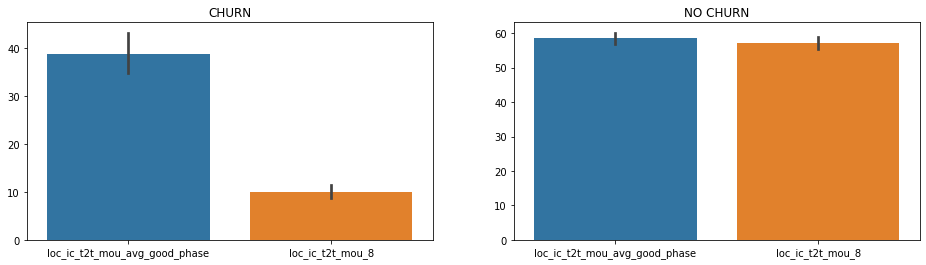

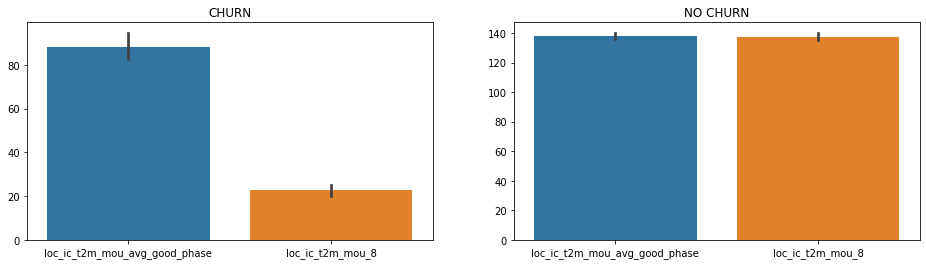

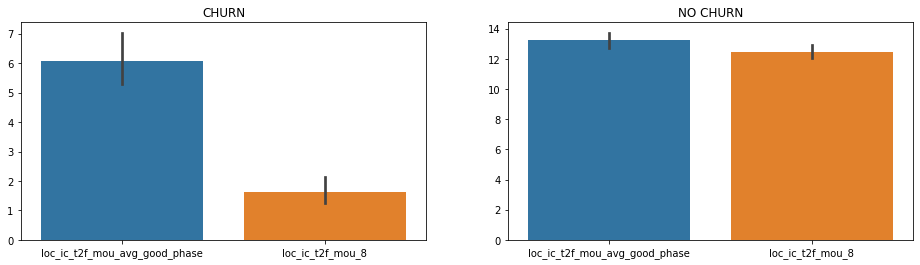

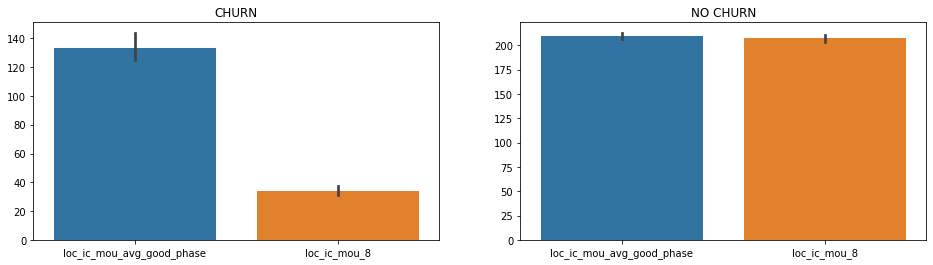

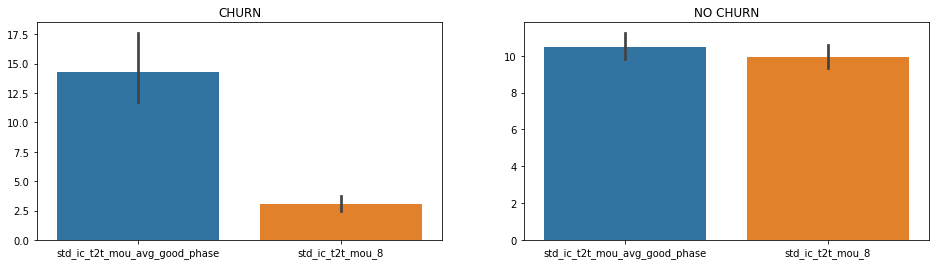

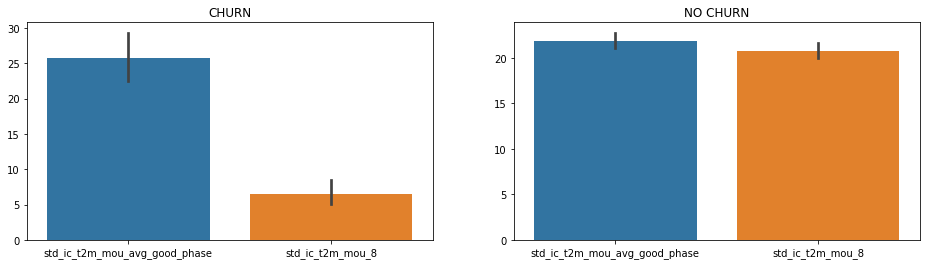

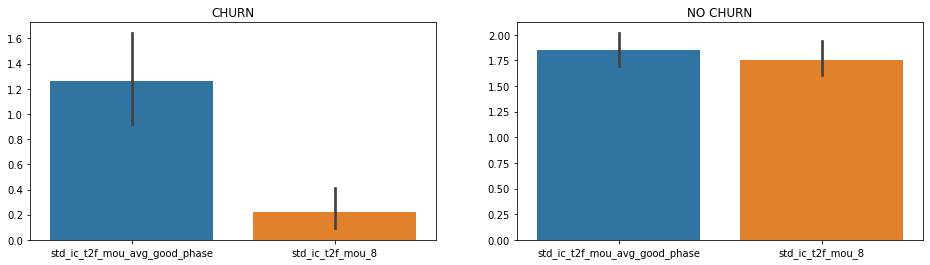

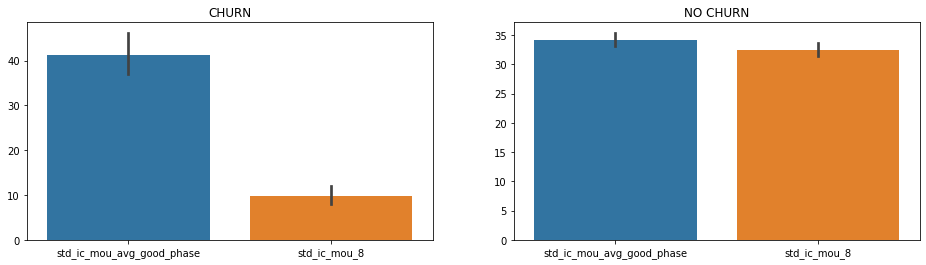

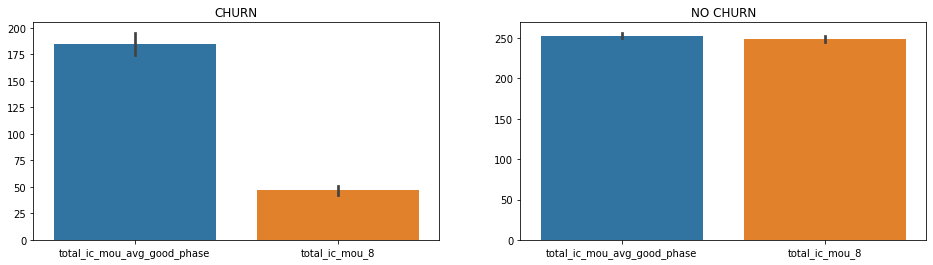

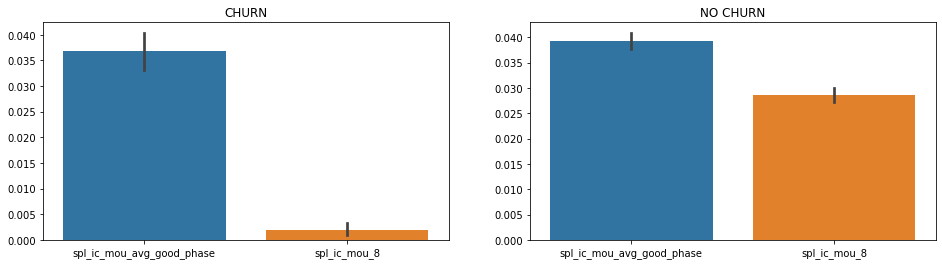

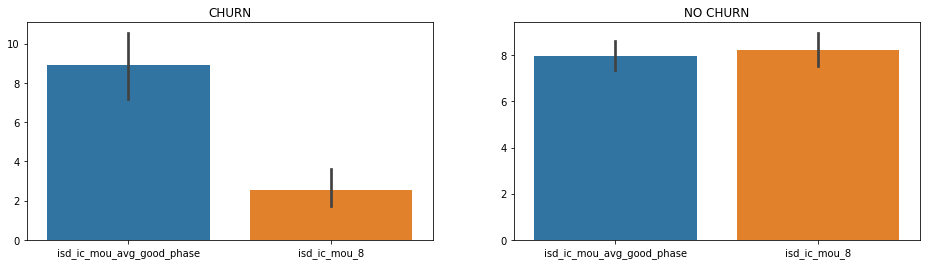

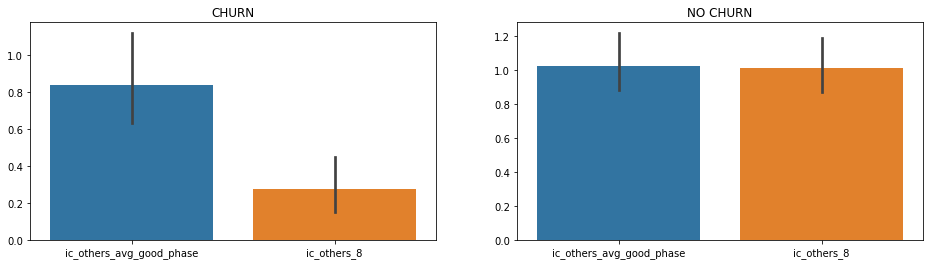

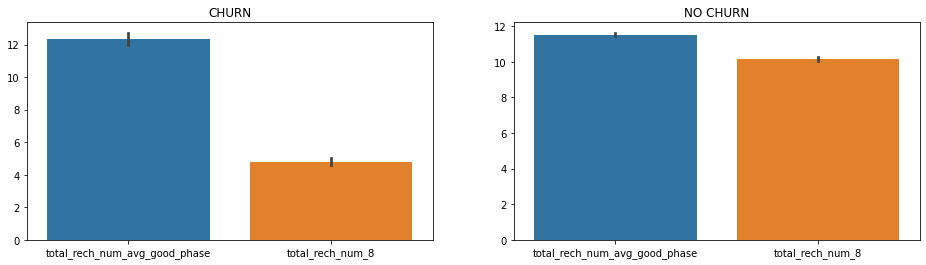

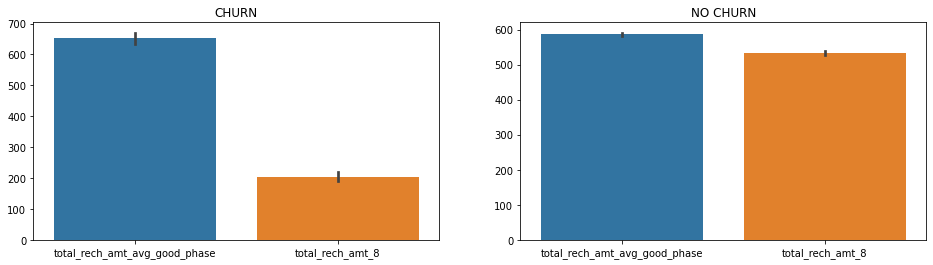

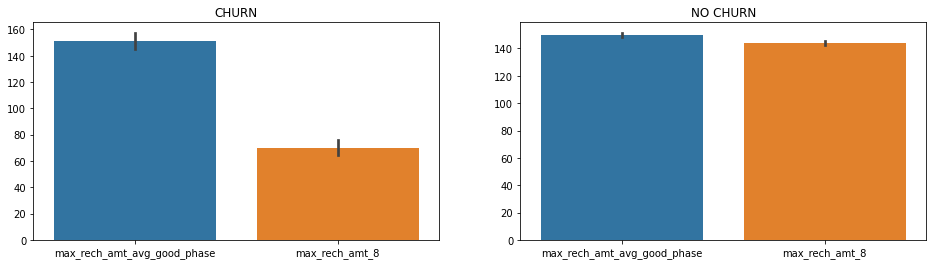

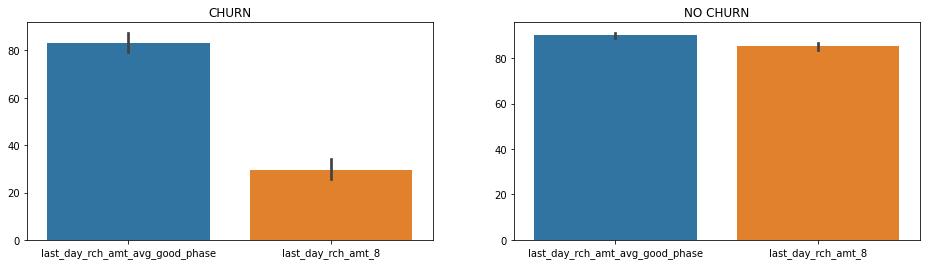

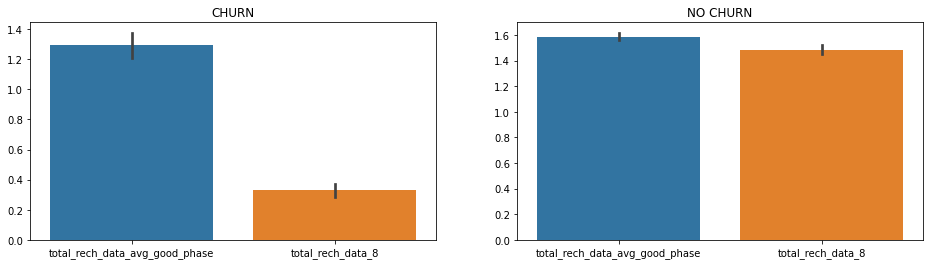

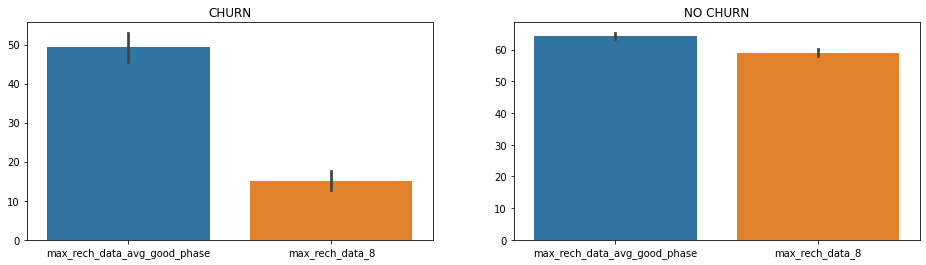

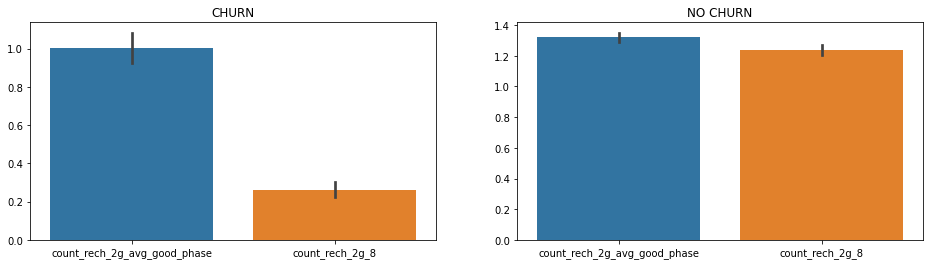

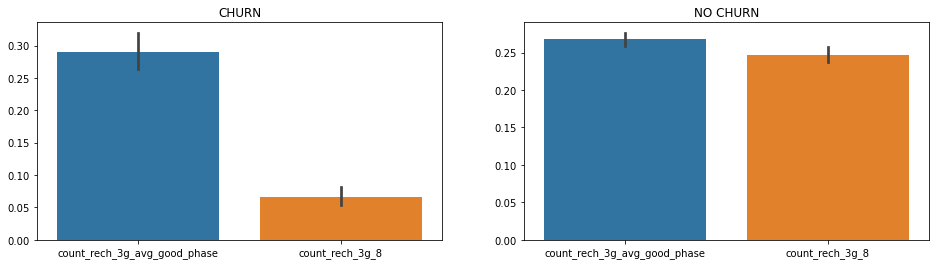

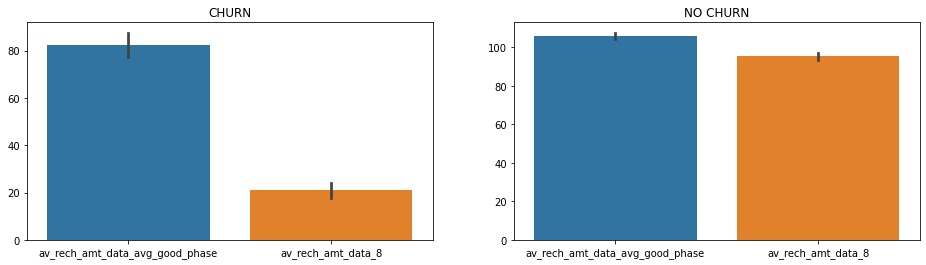

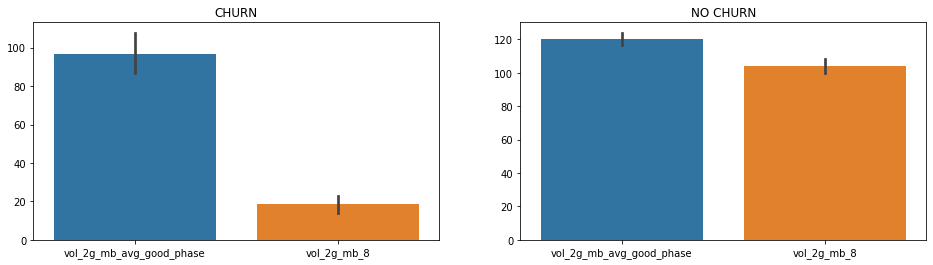

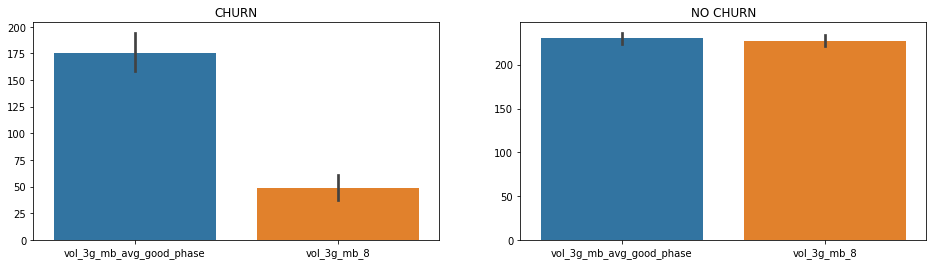

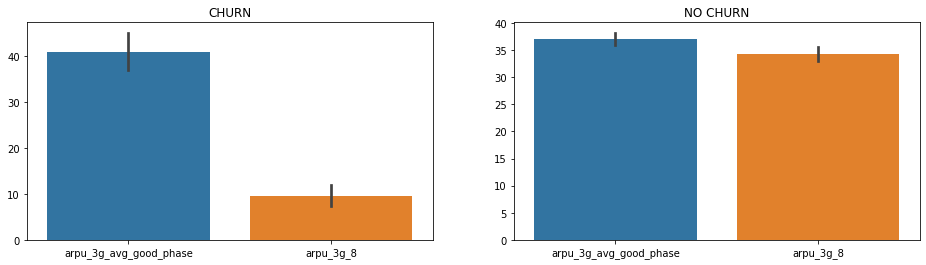

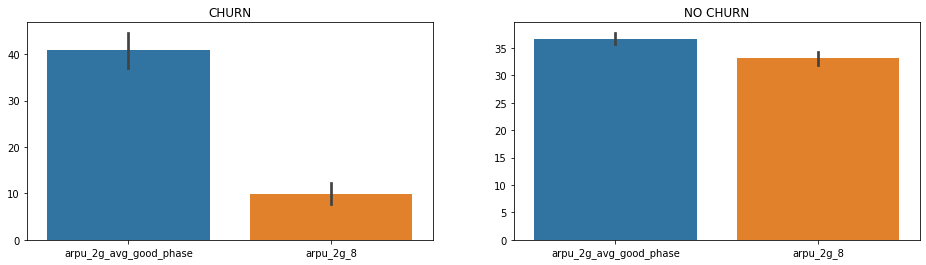

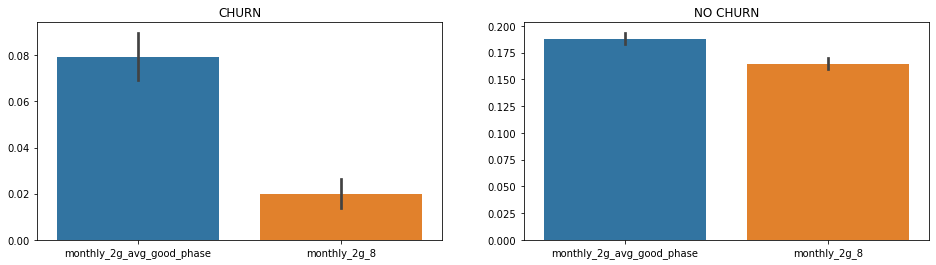

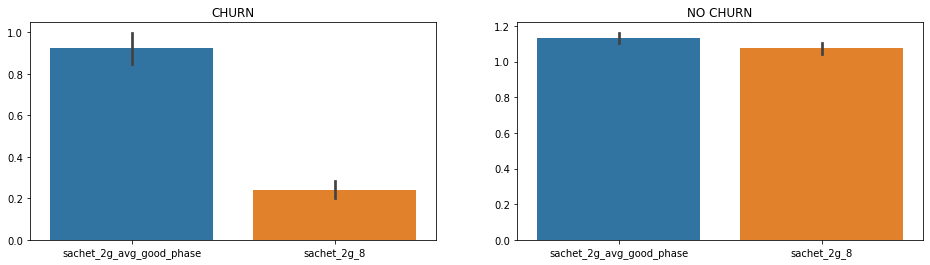

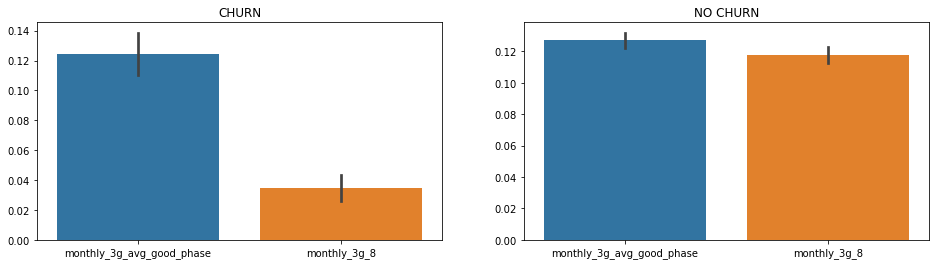

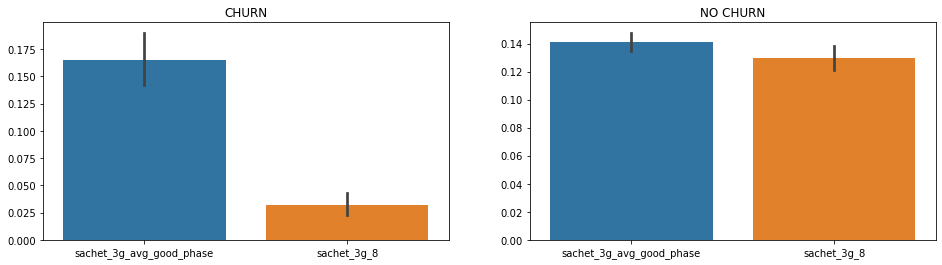

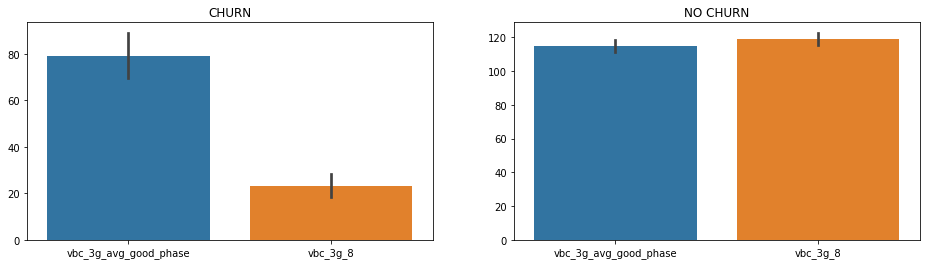

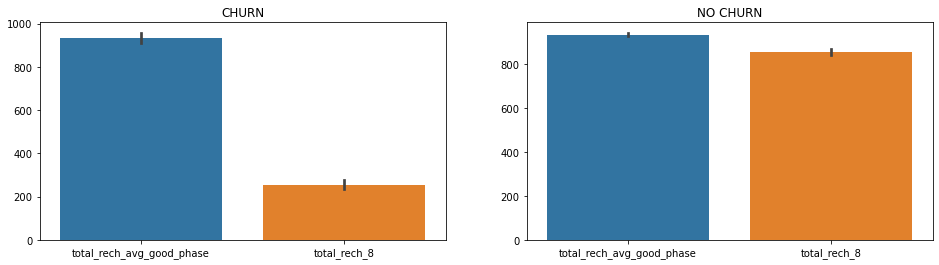

In [60]:
churn_vs_nonchurn(colsToCompare)